### import modules 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import mnist
import pylab
import copy

sns.set()

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### define functions for code

In [14]:

# data loading function
def load_dataset():
    mndata = mnist.MNIST('./python-mnist/data/')
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    
    labels_train = labels_train.astype('int')
    labels_test = labels_test.astype('int')
    return X_train, X_test,labels_train,labels_test

def convert_2_7(x_train,x_test,labels_train,labels_test):
    #import pdb; pdb.set_trace()
    mask_train = np.logical_or(labels_train==2,labels_train==7)
    mask_test = np.logical_or(labels_test==2,labels_test==7)
   # mask_train = labels_train==2 or labels_train==7
    #mask_test = labels_test==2 or labels_test==7
    
    x_train_c = x_train[mask_train]
    x_test_c = x_test[mask_test]
    

    labels_train_c = labels_train[mask_train]
    labels_test_c = labels_test[mask_test]
    
    labels_train_c[labels_train_c==2] = -1
    labels_train_c[labels_train_c==7] = 1

    labels_test_c[labels_test_c==2] = -1
    labels_test_c[labels_test_c==7] = 1

    return x_train_c,x_test_c,labels_train_c,labels_test_c 

def gradient_method(X,y,X_test,y_test,lambda_val):
    not_conv = True
    j_train_vec = []
    j_test_vec = []
    w_vec = []
    b_vec = []
    k_vec = []
    train_classify_vec = []
    test_classify_vec = []

    k = 0
    #step_size = 1e-3
    step_size = 3e-2
    criteria_conv = 0.000004

    w = np.zeros((np.shape(X)[1],))
    b = 0

    n = np.shape(X)[0]
    n_features = np.shape(X)[1]
    n_test = np.shape(X_test)[0]
    
    cost_mu = 1+np.exp(-y.T*(b+np.dot(X,w)))     
    j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
    print('the value of j train is {}'.format(j_train))

    ####### testing part
    cost_mu_test = 1+np.exp(-y_test.T*(b+np.dot(X_test,w)))

    j_test = (1/n_test)*(np.sum(np.log(cost_mu_test))) + lambda_val*np.dot(w.T,w)

    k_vec.append(k)
    j_train_vec.append(j_train)
    j_test_vec.append(j_test)

    ###       
    w_vec.append(w)
    b_vec.append(b)

    #### classificaiton
    train_signed = (b+np.dot(X,w))
    test_signed = (b+np.dot(X_test,w))

    train_data_class = np.sign(train_signed)
    test_data_class = np.sign(test_signed)

    train_classify_error_vec = [train_data_class != y]
    test_classify_error_vec = [test_data_class != y_test]

    train_classify_error = np.sum(train_classify_error_vec)/n
    test_classify_error = np.sum(test_classify_error_vec)/n_test

    train_classify_vec.append(train_classify_error)
    test_classify_vec.append(test_classify_error)
    
    w_old = copy.copy(w)
    b_old = copy.copy(b)
    
    while not_conv:
        ##### training part 
        #mu_vec = [1/(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
        #cost_mu = [(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
        mu_vec = 1/(1+np.exp(-y.T*(b+np.dot(X,w)))) 

        #g_w = (1/n)*np.dot(X.T,(mu_vec - y)) + 2*lambda_val*w
        #g_b = (1/n)*np.sum(mu_vec-y)

        g_w = (1/n)*(np.dot(X.T,(-y*(1-mu_vec)))) + 2*lambda_val*w
        g_b = (1/n)*np.sum(-y*(1-mu_vec))

        # 
        w = w_old - step_size*g_w
        b = b_old - step_size*g_b

        w_vec.append(w)
        b_vec.append(b)
        
        cost_mu = 1+np.exp(-y.T*(b+np.dot(X,w)))
        j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
        ####### testing part

        mu_vec = 1/(1+np.exp(-y_test.T*(b+np.dot(X_test,w)))) 
        cost_mu = 1+np.exp(-y_test.T*(b+np.dot(X_test,w)))

        j_test = (1/n_test)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)

        k_vec.append(k)
        j_train_vec.append(j_train)
        j_test_vec.append(j_test)

        #### classificaiton
        train_signed = (b+np.dot(X,w))
        test_signed = (b+np.dot(X_test,w))

        train_data_class = np.sign(train_signed)
        test_data_class = np.sign(test_signed)

        train_classify_error_vec = [train_data_class != y]
        test_classify_error_vec = [test_data_class != y_test]

        train_classify_error = np.sum(train_classify_error_vec)/n
        test_classify_error = np.sum(test_classify_error_vec)/n_test

        train_classify_vec.append(train_classify_error)
        test_classify_vec.append(test_classify_error)
        
        
        delta_w = np.abs(w-w_old)
        delta_b = np.abs(b-b_old)
        
        #w = np.array(w)
        w_old = copy.copy(w)
        b_old = copy.copy(b)


        # check convergence
        if ((1/n_features)*np.sum(delta_w))<criteria_conv and k>1:
            not_conv = False

        else:
            not_conv = True
            k += 1

        print('the value of j train is {}'.format(j_train))

        #print('the value of delta_w is {}'.format(delta_w))
        #print(mu_vec)
        #print(not_conv)

    return j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec

def SGD(X,y,X_test,y_test,lambda_val,batch_size):
    not_conv = True
    j_train_vec = []
    j_test_vec = []
    w_vec = []
    b_vec = []
    k_vec = []
    train_classify_vec = []
    test_classify_vec = []

    k = 0
    #step_size = 1e-3
    step_size = 5e-2
    criteria_conv = 0.004

    w = np.zeros((np.shape(X)[1],))
    b = 0
    
    ##### gradient descent batch size choice
    batch_range =np.arange(np.shape(X)[0])


    n = np.shape(X)[0]
    n_features = np.shape(X)[1]
    n_test = np.shape(X_test)[0]
    
    cost_mu = 1+np.exp(-y.T*(b+np.dot(X,w)))     
    j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
    print('the value of j train is {}'.format(j_train))

    ####### testing part
    cost_mu_test = 1+np.exp(-y_test.T*(b+np.dot(X_test,w)))

    j_test = (1/n_test)*(np.sum(np.log(cost_mu_test))) + lambda_val*np.dot(w.T,w)

    k_vec.append(k)
    j_train_vec.append(j_train)
    j_test_vec.append(j_test)


    ###       
    w_vec.append(w)
    b_vec.append(b)

    #### classificaiton
    train_signed = (b+np.dot(X,w))
    test_signed = (b+np.dot(X_test,w))

    train_data_class = np.sign(train_signed)
    test_data_class = np.sign(test_signed)

    train_classify_error_vec = [train_data_class != y]
    test_classify_error_vec = [test_data_class != y_test]

    train_classify_error = np.sum(train_classify_error_vec)/n
    test_classify_error = np.sum(test_classify_error_vec)/n_test

    train_classify_vec.append(train_classify_error)
    test_classify_vec.append(test_classify_error)
    
    w_old = copy.copy(w)
    b_old = copy.copy(b)

    while not_conv:
        # stochastic choice
        np.random.shuffle(batch_range)
        inds_choose = np.random.choice(batch_range,size=batch_size,replace=False)
        X_sub = X[inds_choose,:]
        y_sub = y[inds_choose]
        ##### training part 
        #mu_vec = [1/(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
        #cost_mu = [(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
        mu_vec = 1/(1+np.exp(-y_sub.T*(b+np.dot(X_sub,w)))) 

        #g_w = (1/n)*np.dot(X.T,(mu_vec - y)) + 2*lambda_val*w
        #g_b = (1/n)*np.sum(mu_vec-y)

        g_w = (1/batch_size)*(np.dot(X_sub.T,(-y_sub*(1-mu_vec)))) + 2*lambda_val*w
        g_b = (1/batch_size)*np.sum(-y_sub*(1-mu_vec))
        
        # 
        w = w_old - step_size*g_w
        b = b_old - step_size*g_b

        cost_mu = 1+np.exp(-y.T*(b+np.dot(X,w)))
        j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
        print('the value of j train is {}'.format(j_train))

        ####### testing part

        mu_vec = 1/(1+np.exp(-y_test.T*(b+np.dot(X_test,w)))) 
        cost_mu = 1+np.exp(-y_test.T*(b+np.dot(X_test,w)))

        j_test = (1/n_test)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)

        w_vec.append(w)
        b_vec.append(b)

        k_vec.append(k)
        j_train_vec.append(j_train)
        j_test_vec.append(j_test)

        #### classificaiton
        train_signed = (b+np.dot(X,w))
        test_signed = (b+np.dot(X_test,w))

        train_data_class = np.sign(train_signed)
        test_data_class = np.sign(test_signed)

        train_classify_error_vec = [train_data_class != y]
        test_classify_error_vec = [test_data_class != y_test]

        train_classify_error = np.sum(train_classify_error_vec)/n
        test_classify_error = np.sum(test_classify_error_vec)/n_test

        train_classify_vec.append(train_classify_error)
        test_classify_vec.append(test_classify_error)

        delta_w = np.abs(w-w_old)
        delta_b = np.abs(b-b_old)

        #w = np.array(w)
        w_old = copy.copy(w)
        b_old = copy.copy(b)
        # check convergence
       # if ((1/n_features)*np.sum(delta_w))<criteria_conv and k>1:
        if k>1000:
            not_conv = False

        else:
            not_conv = True
            k += 1
            
    return j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec

def newton_method(X,y,X_test,y_test,lambda_val):
    not_conv = True
    j_train_vec = []
    j_test_vec = []
    w_vec = []
    b_vec = []
    k_vec = []
    train_classify_vec = []
    test_classify_vec = []

    k = 1
    #step_size = 1e-3
    step_size = 1
    criteria_conv = 0.004

    w = np.zeros((np.shape(X)[1],))
    b = 0

    n = np.shape(X)[0]
    n_features = np.shape(X)[1]
    n_test = np.shape(X_test)[0]
    #mu_vec = np.zeros((np.shape(X)[0],))
    #cost_mu = np.zeros((np.shape(X)[0],))
    #range_vec = np.arange(len(mu_vec))

    cost_mu = 1+np.exp(-y.T*(b+np.dot(X,w)))     
    j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
    print('the value of j train is {}'.format(j_train))

    ####### testing part
    cost_mu_test = 1+np.exp(-y_test.T*(b+np.dot(X_test,w)))

    j_test = (1/n_test)*(np.sum(np.log(cost_mu_test))) + lambda_val*np.dot(w.T,w)

    k_vec.append(k)
    j_train_vec.append(j_train)
    j_test_vec.append(j_test)


    ###       
    w_vec.append(w)
    b_vec.append(b)

    #### classificaiton
    train_signed = (b+np.dot(X,w))
    test_signed = (b+np.dot(X_test,w))

    train_data_class = np.sign(train_signed)
    test_data_class = np.sign(test_signed)

    train_classify_error_vec = [train_data_class != y]
    test_classify_error_vec = [test_data_class != y_test]

    train_classify_error = np.sum(train_classify_error_vec)/n
    test_classify_error = np.sum(test_classify_error_vec)/n_test

    train_classify_vec.append(train_classify_error)
    test_classify_vec.append(test_classify_error)
    
    w_old = copy.copy(w)
    b_old = copy.copy(b)

    while not_conv:
 
        ##### training part 
        #mu_vec = [1/(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
        #cost_mu = [(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
        mu_vec = 1/(1+np.exp(-y.T*(b+np.dot(X,w))))
        #g_w = (1/n)*np.dot(X.T,(mu_vec - y)) + 2*lambda_val*w
        #g_b = (1/n)*np.sum(mu_vec-y)

        g_w = (1/n)*(np.dot(X.T,(-y*(1-mu_vec)))) + 2*lambda_val*w
        g_b = (1/n)*np.sum(-y*(1-mu_vec))
        
        s_vec = mu_vec*(1-mu_vec)
        diag_sigmoid = np.diag(s_vec)
        identity_lambda = np.identity(np.shape(X)[1])
        h_w = (1/n)*np.dot(X.T,np.dot(diag_sigmoid,X)) + lambda_val*identity_lambda
        h_b = np.sum((1/n)*s_vec)
        
        d_k_w = np.linalg.solve(h_w,-g_w)
        #d_k_b = np.linalg.solve(h_b,-g_b)
        d_k_b = -g_b/h_b

        # 
        w = w_old + step_size*d_k_w
        b = b_old + step_size*d_k_b
        
        cost_mu = 1+np.exp(-y.T*(b+np.dot(X,w)))     

        j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
        ####### testing part
        cost_mu_test = 1+np.exp(-y_test.T*(b+np.dot(X_test,w)))

        j_test = (1/n_test)*(np.sum(np.log(cost_mu_test))) + lambda_val*np.dot(w.T,w)
                             
        k_vec.append(k)
        j_train_vec.append(j_train)
        j_test_vec.append(j_test)

        
        ###       
        w_vec.append(w)
        b_vec.append(b)
        
        #### classificaiton
        train_signed = (b+np.dot(X,w))
        test_signed = (b+np.dot(X_test,w))

        train_data_class = np.sign(train_signed)
        test_data_class = np.sign(test_signed)

        train_classify_error_vec = [train_data_class != y]
        test_classify_error_vec = [test_data_class != y_test]

        train_classify_error = np.sum(train_classify_error_vec)/n
        test_classify_error = np.sum(test_classify_error_vec)/n_test

        train_classify_vec.append(train_classify_error)
        test_classify_vec.append(test_classify_error)
        
        print('the value of j train is {}'.format(j_train))
        
        delta_w = np.abs(w-w_old)
        delta_b = np.abs(b-b_old)
        
        #w = np.array(w)
        w_old = copy.copy(w)
        b_old = copy.copy(b)
        
        print((1/n_features)*np.sum(delta_w))
                            
        # check convergence
        if ((1/n_features)*np.sum(delta_w))<criteria_conv and k>1:
            not_conv = False

        else:
            not_conv = True
            k += 1

    return j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec


def plot_objective_train_test(k_vec,j_train_vec,j_test_vec,train_classify_vec,test_classify_vec,titl_1):
    plt.figure(figsize=(4, 4), dpi=600)
    plt.plot(k_vec,j_train_vec,label='training')
    plt.plot(k_vec,j_test_vec,label='testing')
    plt.xlabel('iteration number')
    plt.ylabel('cost function')
    plt.title(titl_1 + 'Cost function vs. iteration')
    plt.legend()
    index = np.argmin(j_train_vec)
    k_best = k_vec[index]
    w_best = w_vec[index]
    titl_1_save = titl_1[:-2]
    titl_1_save = titl_1_save.replace(" ","_")
    plt.savefig(titl_1_save + 'cost_func')

    plt.figure(figsize=(4, 4), dpi=600)
    plt.plot(k_vec,train_classify_vec,label='training data')
    plt.plot(k_vec,test_classify_vec,label='test data')
    plt.xlabel('iteration number')
    plt.ylabel('misclassification error')
    plt.title(titl_1 + 'Misclassification error vs. iteration number')
    plt.legend()
    plt.savefig(titl_1_save + 'mis_class_error')


### Load and convert data 

In [15]:
x_train,x_test,labels_train,labels_test = load_dataset()

In [16]:
x_train_c,x_test_c,labels_train_c,labels_test_c  = convert_2_7(x_train,x_test,labels_train,labels_test)

In [17]:
lambda_val = 10**-1

### perform processing 

In [18]:
j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec = gradient_method(x_train_c,labels_train_c,x_test_c,labels_test_c,lambda_val)

the value of j train is 0.6931471805599452
the value of j train is 0.6419470646866495
the value of j train is 0.598117300684645
the value of j train is 0.5604211947512611
the value of j train is 0.5278547997873291
the value of j train is 0.49959429616248746
the value of j train is 0.4749599174213264
the value of j train is 0.45338942576567126
the value of j train is 0.4344172147998433
the value of j train is 0.41765719951203456
the value of j train is 0.4027886347089531
the value of j train is 0.3895443752487592
the value of j train is 0.37770121332085266
the value of j train is 0.367071972129278
the value of j train is 0.3574990653884604
the value of j train is 0.3488492645827339
the value of j train is 0.3410094514583664
the value of j train is 0.3338831686618977
the value of j train is 0.3273878142257288
the value of j train is 0.3214523543521297
the value of j train is 0.31601545325740465
the value of j train is 0.3110239388969347
the value of j train is 0.30643153967427106
the val

the value of j train is 0.23519702721845015
the value of j train is 0.2351899065663576
the value of j train is 0.23518291180333256
the value of j train is 0.23517603970103584
the value of j train is 0.23516928712922774
the value of j train is 0.23516265105239403
the value of j train is 0.2351561285264992
the value of j train is 0.23514971669586054
the value of j train is 0.2351434127901399
the value of j train is 0.2351372141214473
the value of j train is 0.23513111808155224
the value of j train is 0.23512512213919823
the value of j train is 0.235119223837517
the value of j train is 0.23511342079153763
the value of j train is 0.2351077106857875
the value of j train is 0.23510209127198095
the value of j train is 0.23509656036679266
the value of j train is 0.2350911158497121
the value of j train is 0.2350857556609759
the value of j train is 0.2350804777995753
the value of j train is 0.23507528032133532
the value of j train is 0.23507016133706365
the value of j train is 0.2350651190107655

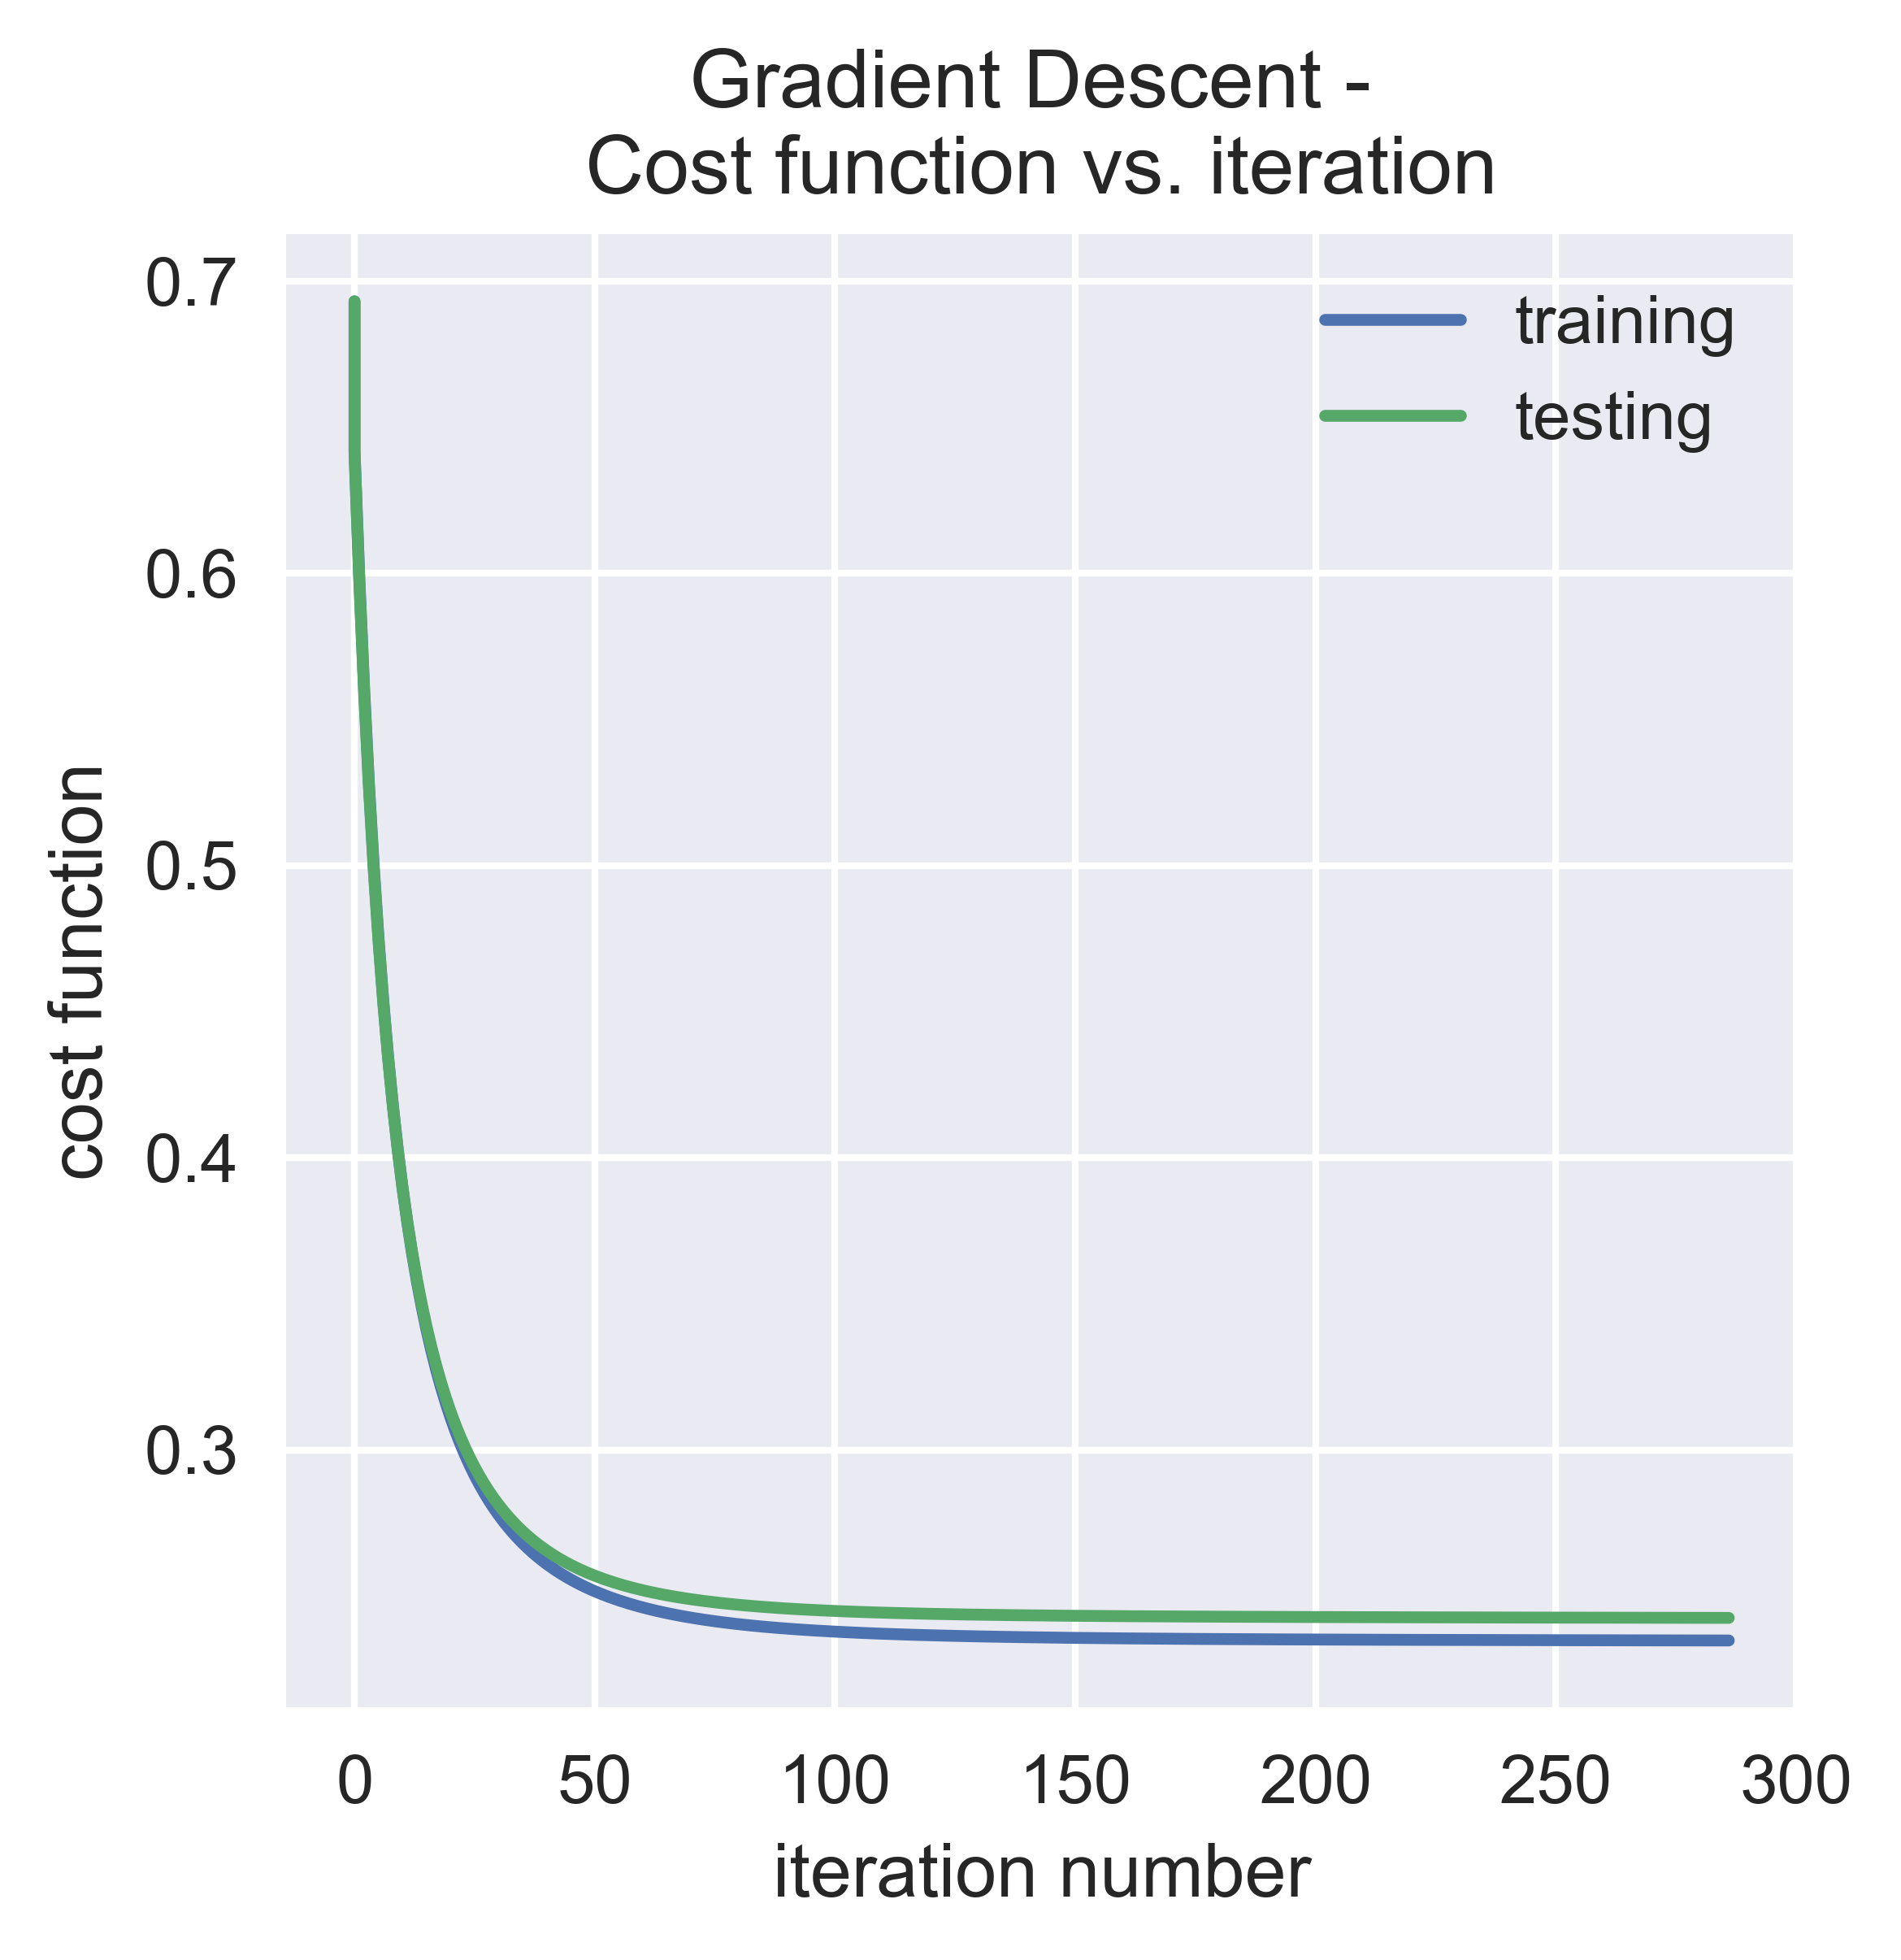

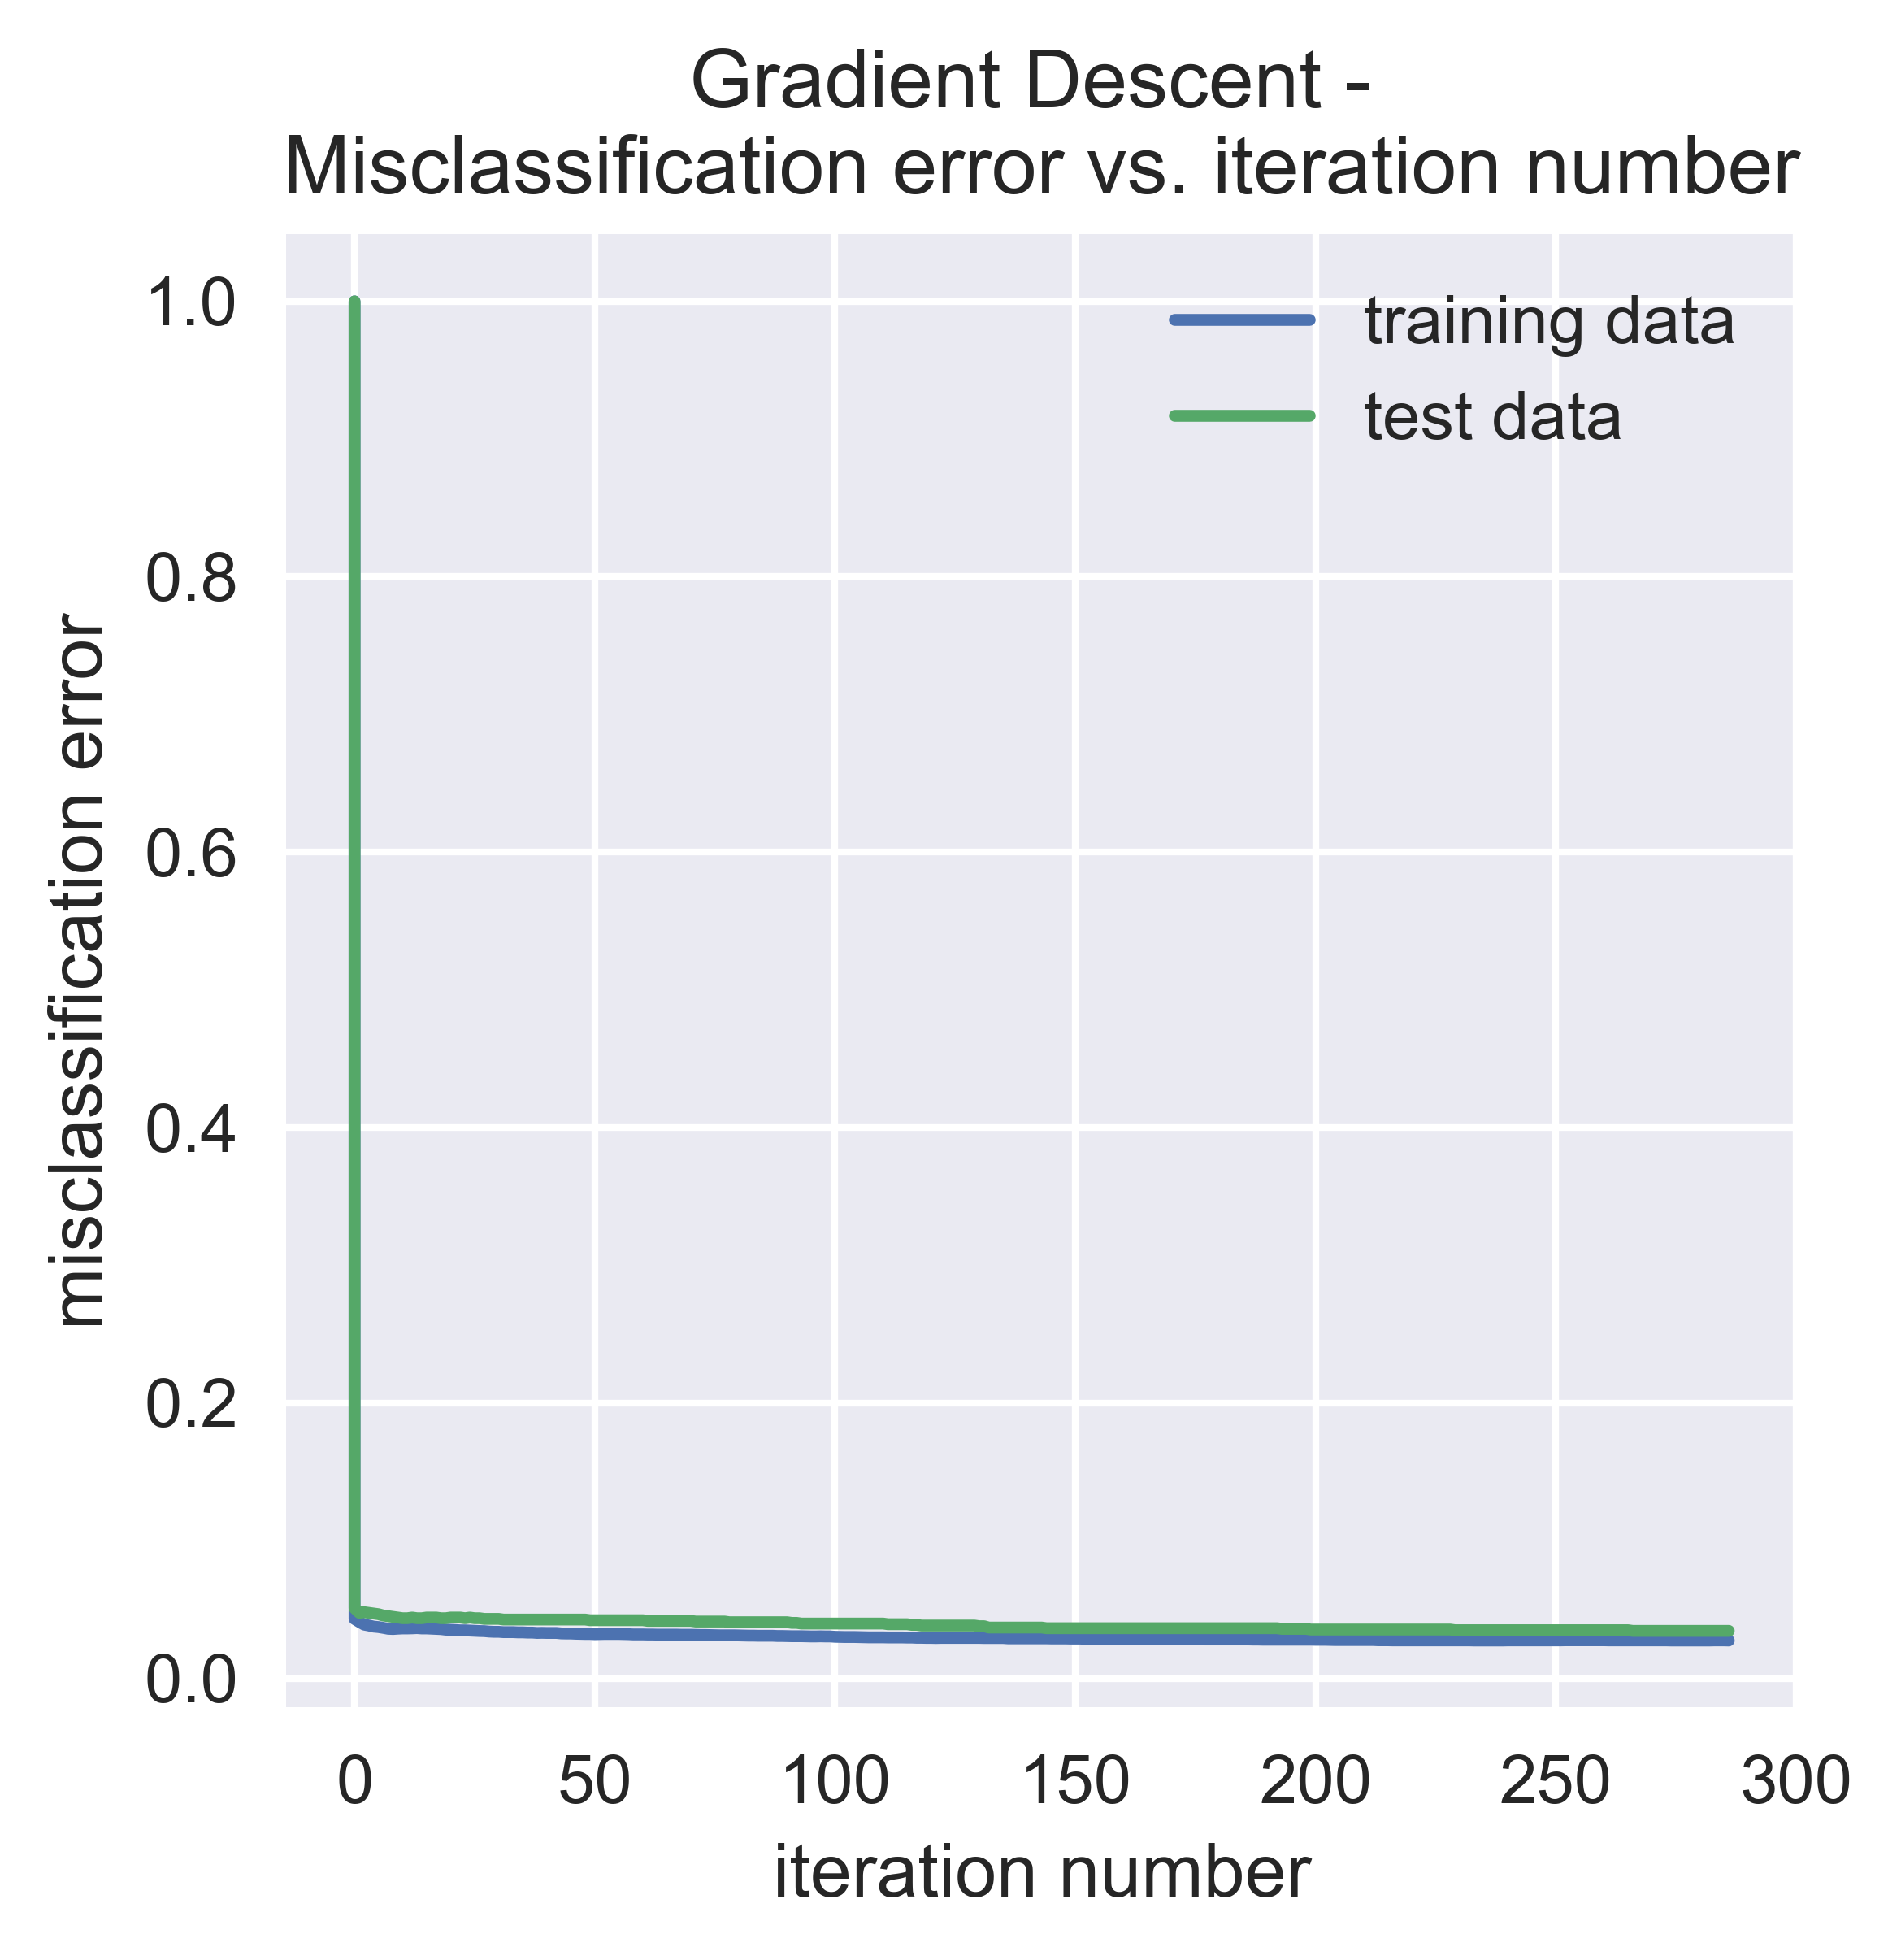

In [19]:
plot_objective_train_test(k_vec,j_train_vec,j_test_vec,train_classify_vec,test_classify_vec,'Gradient Descent - \n')

### stochastic gradient descent - 1 example

In [20]:
batch_size = 1
j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec = SGD(x_train_c,labels_train_c,x_test_c,labels_test_c,lambda_val,batch_size)

the value of j train is 0.6931471805599452
the value of j train is 0.9032598463922772
the value of j train is 0.9731650312006637
the value of j train is 1.077666889343411
the value of j train is 0.5386849904906716
the value of j train is 0.5766898793860091
the value of j train is 0.6641064406610324
the value of j train is 0.5004719518280272
the value of j train is 0.5333839812088305
the value of j train is 0.4362392722888521
the value of j train is 0.44102346641237117
the value of j train is 0.5075200318104213
the value of j train is 0.5603968764339278
the value of j train is 0.4137847925583801
the value of j train is 0.4441779369862483
the value of j train is 0.5061542383072719
the value of j train is 0.5173951881487018
the value of j train is 0.42670811801234576
the value of j train is 0.3492736561146808
the value of j train is 0.3789978678024423
the value of j train is 0.3927769010488593
the value of j train is 0.41670173623450724
the value of j train is 0.42864612544054254
the valu

the value of j train is 0.25453414052321804
the value of j train is 0.2534350437112217
the value of j train is 0.25329389638256583
the value of j train is 0.2528201581054456
the value of j train is 0.2522724352714072
the value of j train is 0.25175450677295974
the value of j train is 0.3119703617294426
the value of j train is 0.31438382838913054
the value of j train is 0.32248670887788256
the value of j train is 0.2683470713609679
the value of j train is 0.2762420982809724
the value of j train is 0.3086309197979488
the value of j train is 0.32111130628082174
the value of j train is 0.2681257686092886
the value of j train is 0.2692566874431578
the value of j train is 0.2741555549902903
the value of j train is 0.29094899177735245
the value of j train is 0.28299159951400793
the value of j train is 0.2925851809769977
the value of j train is 0.27929409929063215
the value of j train is 0.2836771768413981
the value of j train is 0.2642665176562667
the value of j train is 0.2628751203820051
th

the value of j train is 0.32804756036804833
the value of j train is 0.319970572313658
the value of j train is 0.3215758449495053
the value of j train is 0.2562962093272957
the value of j train is 0.2553357409386794
the value of j train is 0.25843893693778475
the value of j train is 0.2560784903202999
the value of j train is 0.256803070337242
the value of j train is 0.25679488158120056
the value of j train is 0.27321496531428857
the value of j train is 0.26622783768779656
the value of j train is 0.27063188374760966
the value of j train is 0.26376288984382457
the value of j train is 0.25997447450004496
the value of j train is 0.2575299179521908
the value of j train is 0.2574708055608892
the value of j train is 0.259689719198641
the value of j train is 0.26815715691746034
the value of j train is 0.284498352486494
the value of j train is 0.2699105021314884
the value of j train is 0.26517658774282227
the value of j train is 0.2846366246650311
the value of j train is 0.2635024578362349
the v

the value of j train is 0.2578715543225676
the value of j train is 0.255072516553763
the value of j train is 0.2542063358207368
the value of j train is 0.25268446216520646
the value of j train is 0.25245801061216
the value of j train is 0.25162689854043996
the value of j train is 0.25231601680722954
the value of j train is 0.25364110012346824
the value of j train is 0.2538173102837167
the value of j train is 0.2540865762106579
the value of j train is 0.2552117134231203
the value of j train is 0.25573019835667093
the value of j train is 0.25557230945055937
the value of j train is 0.24992424730860868
the value of j train is 0.24976786539129847
the value of j train is 0.2600914437902985
the value of j train is 0.2508326001340395
the value of j train is 0.24674701654221382
the value of j train is 0.24753405186791183
the value of j train is 0.24788882132617446
the value of j train is 0.2485064849625001
the value of j train is 0.3219399557526903
the value of j train is 0.28080046199562825
th

the value of j train is 0.2526494015869368
the value of j train is 0.25284263440578053
the value of j train is 0.2527995265692388
the value of j train is 0.2522129101058025
the value of j train is 0.2682514296316395
the value of j train is 0.25767042811876106
the value of j train is 0.2573949702542693
the value of j train is 0.2545290789521388
the value of j train is 0.25143764281630815
the value of j train is 0.25530432707872647
the value of j train is 0.25496691319096976
the value of j train is 0.2592053985864086
the value of j train is 0.261846618811529
the value of j train is 0.25301579041578676
the value of j train is 0.25345431286272513
the value of j train is 0.26630251215243395
the value of j train is 0.26871654239375864
the value of j train is 0.2694823506647163
the value of j train is 0.2718243125665335
the value of j train is 0.2741091297663853
the value of j train is 0.2836182606176756
the value of j train is 0.2983268248133871
the value of j train is 0.31470096818820037
th

the value of j train is 0.2534504061248544
the value of j train is 0.2567768468947005
the value of j train is 0.25321967746990287
the value of j train is 0.2648838197345768
the value of j train is 0.2578942743063198
the value of j train is 0.24965311077332492
the value of j train is 0.24751670866350764
the value of j train is 0.24808464130182006
the value of j train is 0.25436884305283636
the value of j train is 0.2500037300973106
the value of j train is 0.2795054937631818
the value of j train is 0.2559790542570354
the value of j train is 0.2556410088750493
the value of j train is 0.249207935322753
the value of j train is 0.24782347856489548


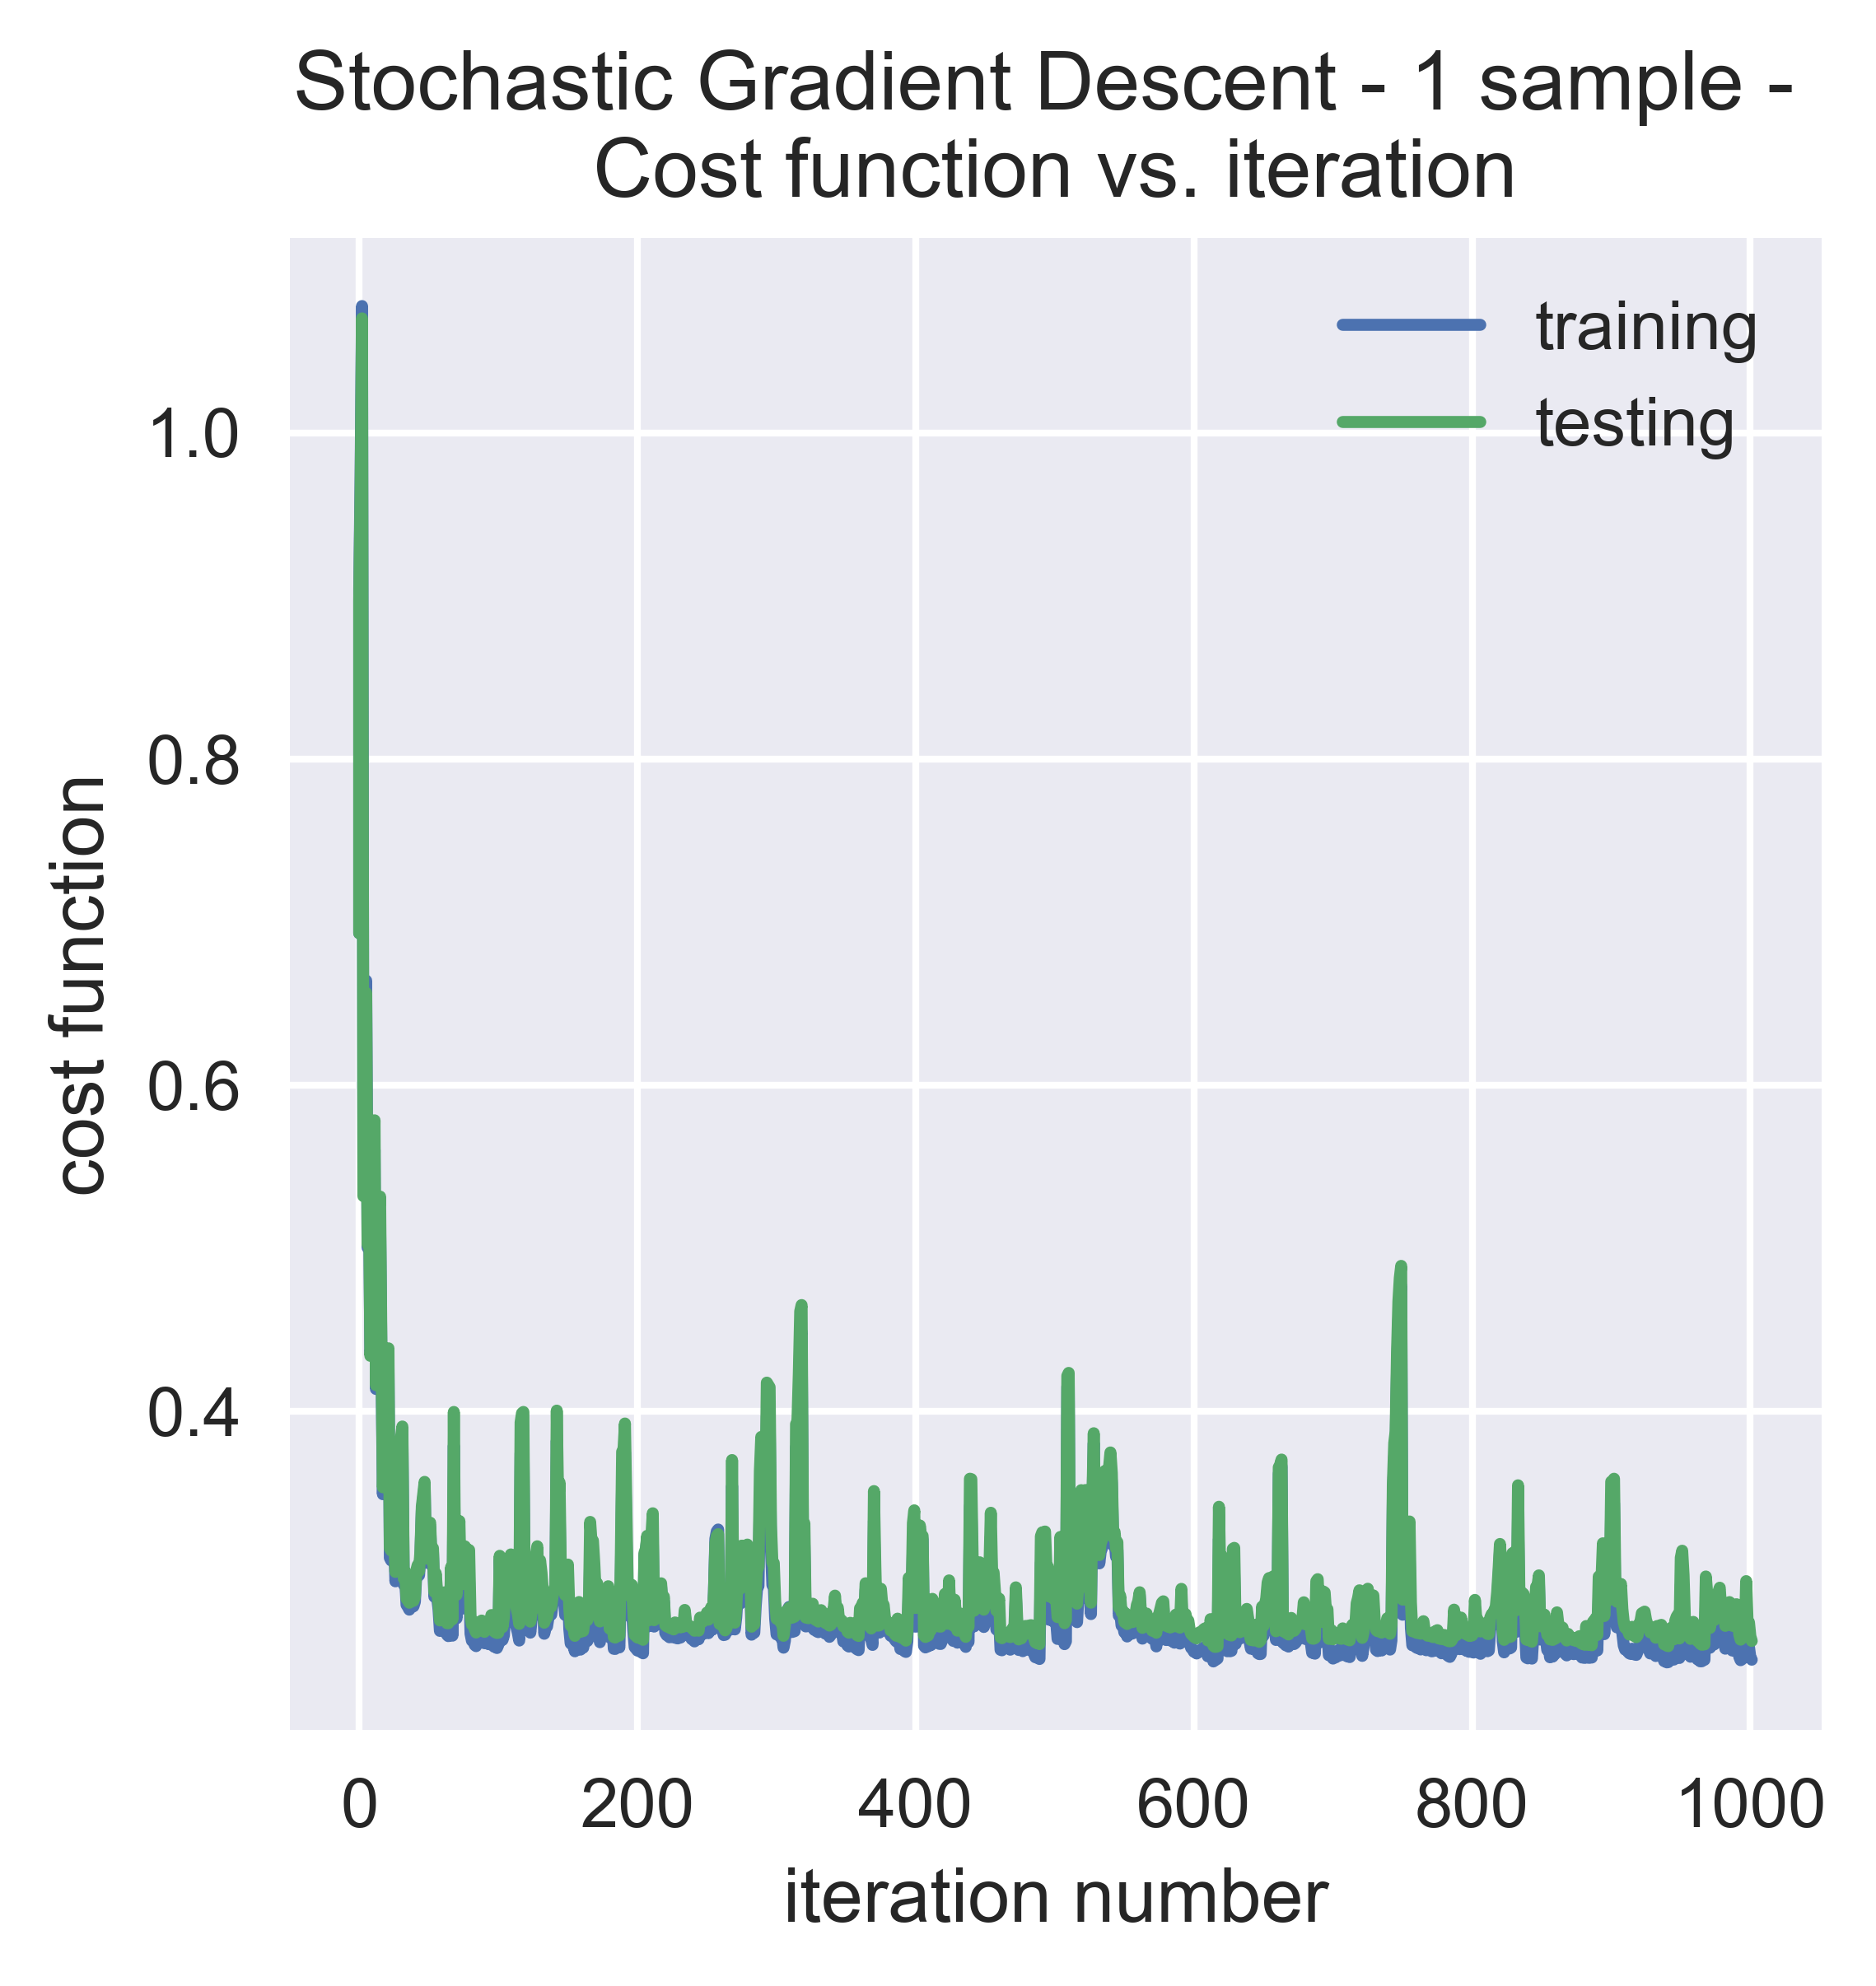

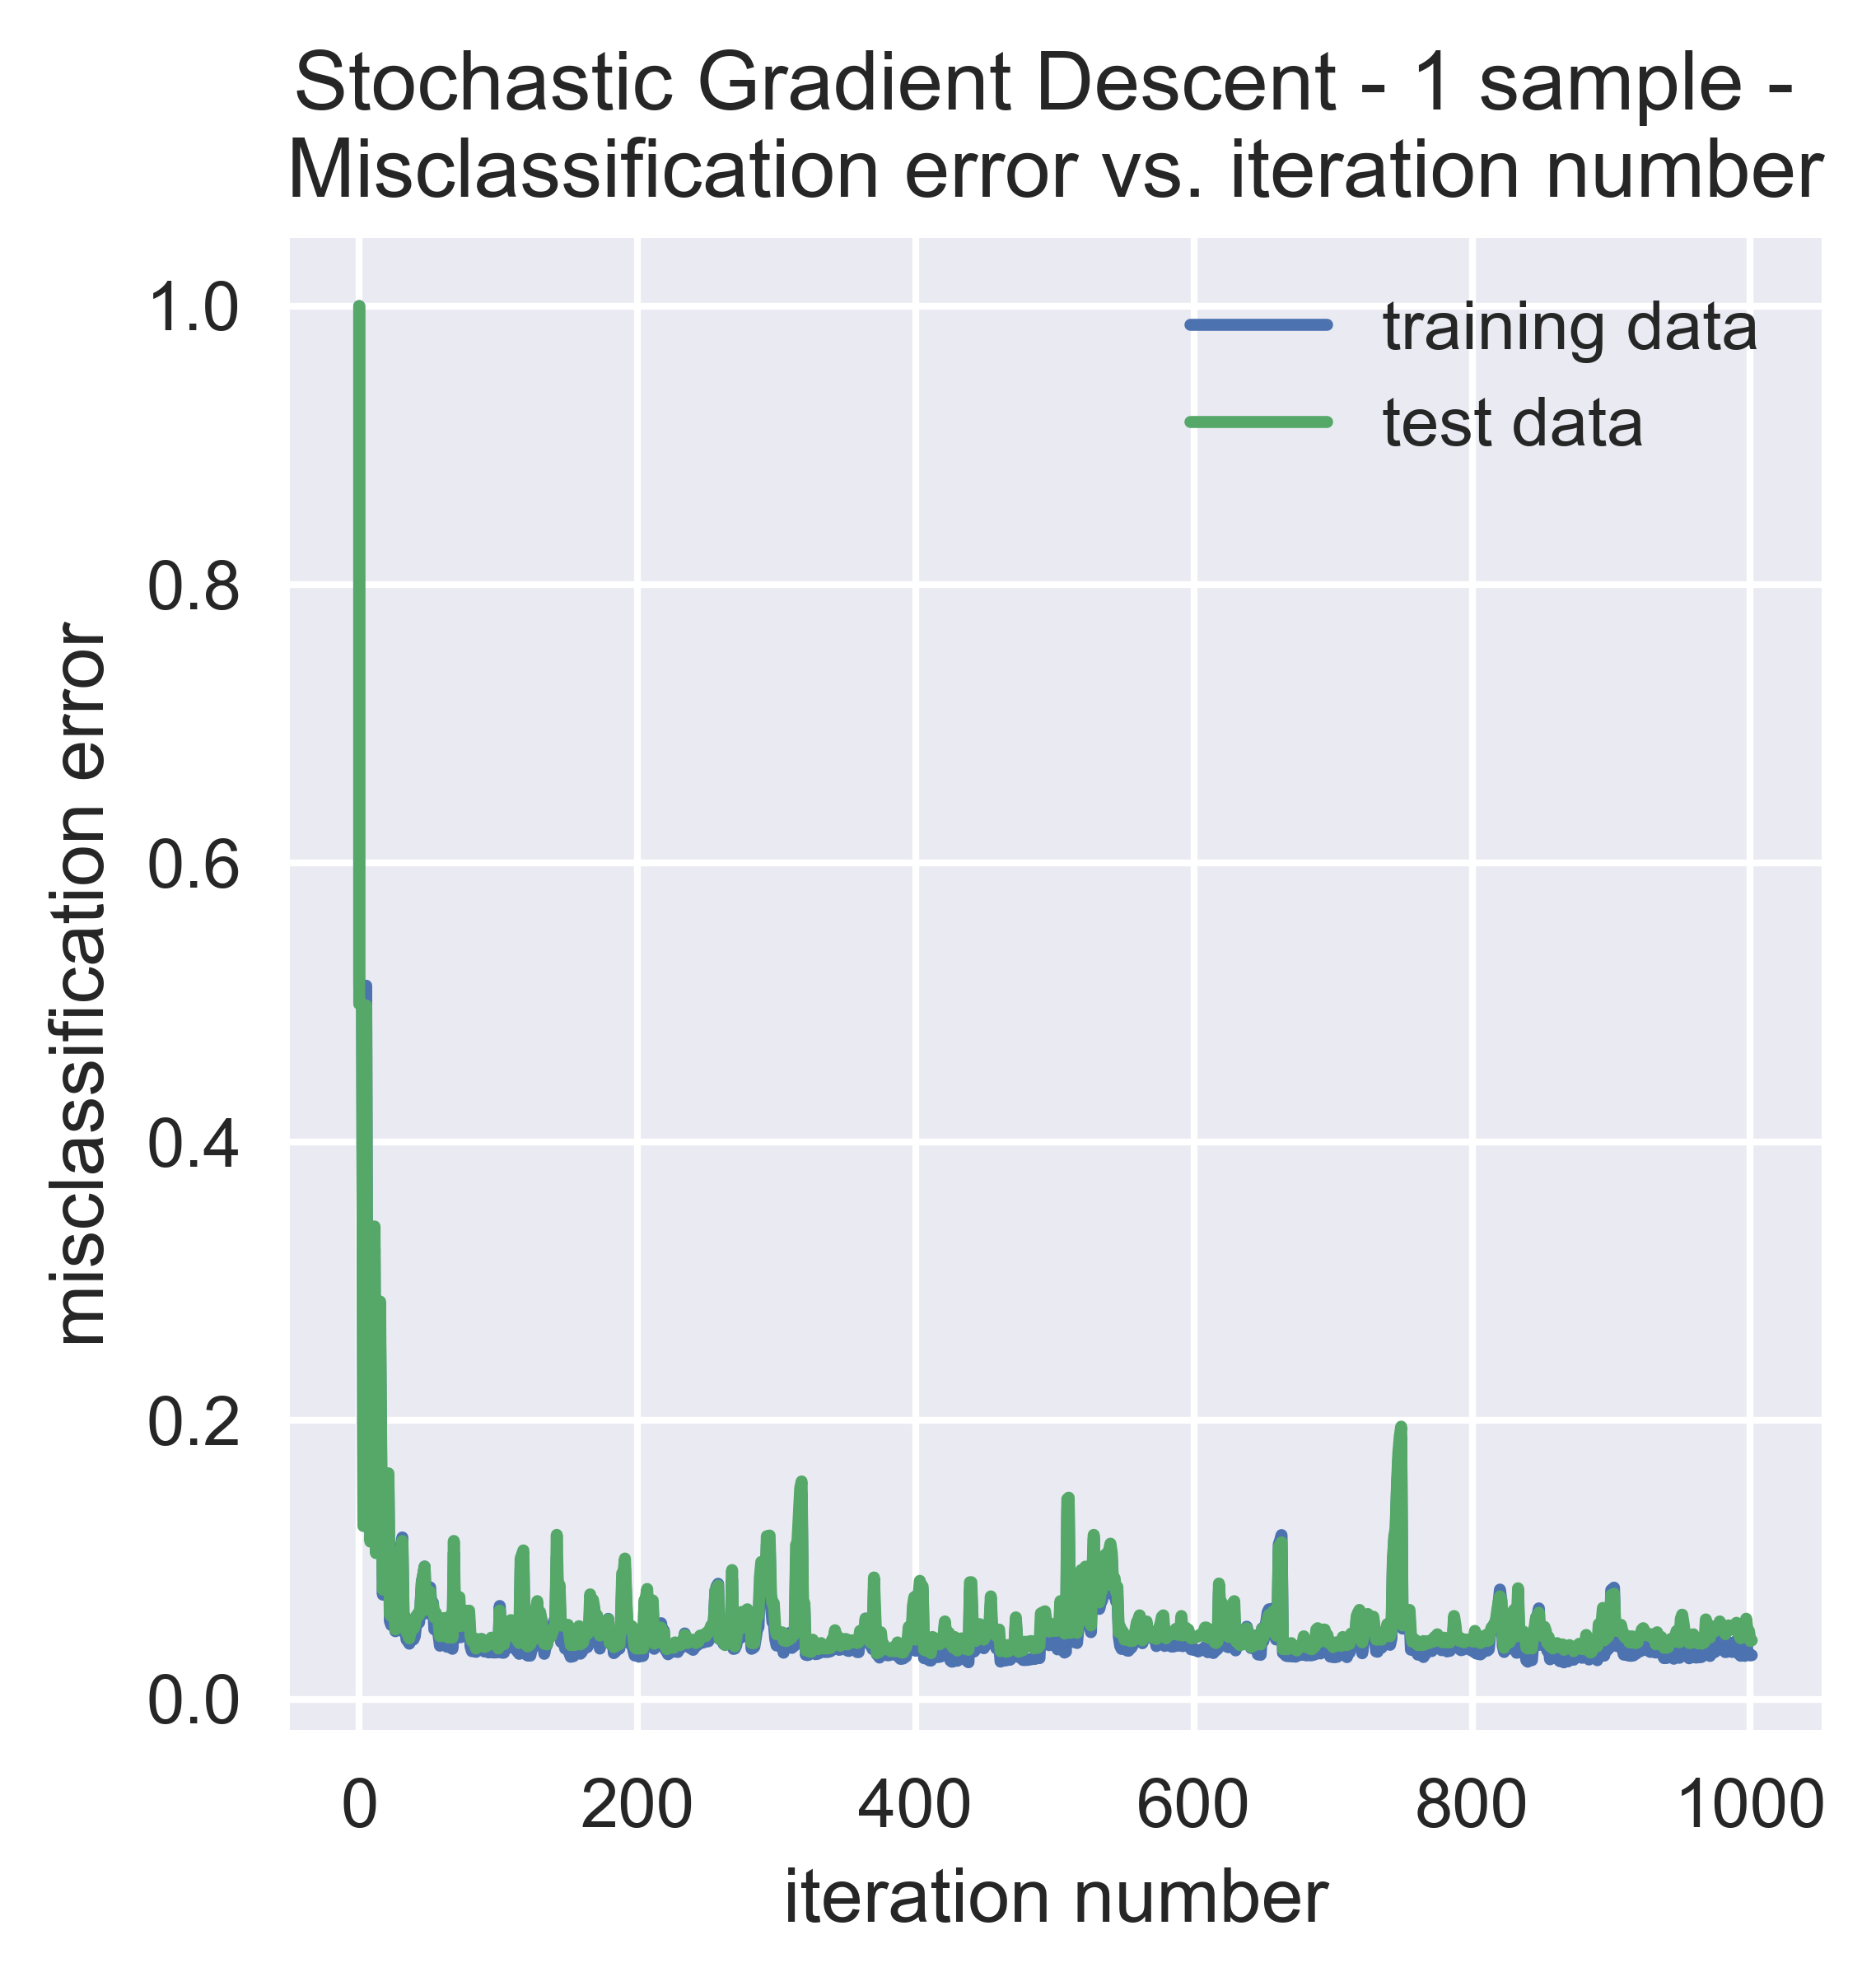

In [21]:
plot_objective_train_test(k_vec,j_train_vec,j_test_vec,train_classify_vec,test_classify_vec,'Stochastic Gradient Descent - 1 sample - \n')

### stochastic gradient descent - batch size 100

In [22]:
batch_size = 100 
j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec = SGD(x_train_c,labels_train_c,x_test_c,labels_test_c,lambda_val,batch_size)

the value of j train is 0.6931471805599452
the value of j train is 0.6062809779267115
the value of j train is 0.5439061851804168
the value of j train is 0.498989096222877
the value of j train is 0.4558584866816835
the value of j train is 0.42517924196750706
the value of j train is 0.40117600959103933
the value of j train is 0.38022947606502416
the value of j train is 0.36113994843236086
the value of j train is 0.3472555062481986
the value of j train is 0.3333658021139124
the value of j train is 0.3238673181962943
the value of j train is 0.31464528384832513
the value of j train is 0.3071823288321611
the value of j train is 0.29994698745968384
the value of j train is 0.29373579824655505
the value of j train is 0.2881389547126729
the value of j train is 0.28309123168284794
the value of j train is 0.2789730054035778
the value of j train is 0.2757692750698612
the value of j train is 0.2712550166173747
the value of j train is 0.26929032683040544
the value of j train is 0.2662717407286216
the

the value of j train is 0.2351063274480301
the value of j train is 0.23519541719936526
the value of j train is 0.23506070969411
the value of j train is 0.23501658645619636
the value of j train is 0.23491737242265595
the value of j train is 0.23499790723821415
the value of j train is 0.2351060786190537
the value of j train is 0.2350798371885309
the value of j train is 0.2349568496556219
the value of j train is 0.2352850282747159
the value of j train is 0.23509147882312514
the value of j train is 0.234951538652158
the value of j train is 0.23507954083873558
the value of j train is 0.23494050962446206
the value of j train is 0.23489217674774437
the value of j train is 0.2350149560969458
the value of j train is 0.2348560996787731
the value of j train is 0.23494319756068416
the value of j train is 0.234892433120584
the value of j train is 0.2348772012285646
the value of j train is 0.23488721053192843
the value of j train is 0.23485320558914052
the value of j train is 0.23488186827388738
the

the value of j train is 0.23464877919334493
the value of j train is 0.23467058722371054
the value of j train is 0.23488290595962796
the value of j train is 0.2347284305449347
the value of j train is 0.23502052943262697
the value of j train is 0.23481827077793788
the value of j train is 0.23464600441297362
the value of j train is 0.23499343206532647
the value of j train is 0.234768462838058
the value of j train is 0.23487468017657087
the value of j train is 0.23475474406563188
the value of j train is 0.2347168505094026
the value of j train is 0.23462133127534993
the value of j train is 0.23469520493633683
the value of j train is 0.23458873375744405
the value of j train is 0.23459516559821594
the value of j train is 0.2345619913726913
the value of j train is 0.23469417404166223
the value of j train is 0.23454998520869264
the value of j train is 0.23454640196770898
the value of j train is 0.23477232939778722
the value of j train is 0.2345251499945111
the value of j train is 0.234577981294

the value of j train is 0.23435604587084358
the value of j train is 0.23439799787489765
the value of j train is 0.23449118986802325
the value of j train is 0.23448308766414155
the value of j train is 0.23489069757454578
the value of j train is 0.2347176470186056
the value of j train is 0.23462710087978625
the value of j train is 0.23446597277239664
the value of j train is 0.23432120694950848
the value of j train is 0.2343160971137305
the value of j train is 0.23431137473006544
the value of j train is 0.23483472807273761
the value of j train is 0.2346723110739455
the value of j train is 0.23431871320931208
the value of j train is 0.23429881645159906
the value of j train is 0.2342939288426205
the value of j train is 0.23431713406988175
the value of j train is 0.234312555431588
the value of j train is 0.2344076117562835
the value of j train is 0.234297803073519
the value of j train is 0.23431430964648653
the value of j train is 0.23436314253170093
the value of j train is 0.234362538095959

the value of j train is 0.23415092325479214
the value of j train is 0.23418534313718575
the value of j train is 0.23404433715515766
the value of j train is 0.23416203661678708
the value of j train is 0.23405703298486147
the value of j train is 0.23403749959931605
the value of j train is 0.2340658728767026
the value of j train is 0.234153190409882
the value of j train is 0.2341463301783827
the value of j train is 0.23408300996391318
the value of j train is 0.23406679590358792
the value of j train is 0.2340883519197023
the value of j train is 0.2340595172838733
the value of j train is 0.23407370230727056
the value of j train is 0.23417382530115743
the value of j train is 0.23416609926794527
the value of j train is 0.2340705886511133
the value of j train is 0.23403998995127767
the value of j train is 0.23406889630596092
the value of j train is 0.2340906373881232
the value of j train is 0.23404814876862975
the value of j train is 0.234097916066563
the value of j train is 0.2340626830733153

the value of j train is 0.23385155783243566
the value of j train is 0.2338304365319086
the value of j train is 0.23381600582153866
the value of j train is 0.23388281344867773
the value of j train is 0.23387647839509867
the value of j train is 0.2338332540212197
the value of j train is 0.2338251848664535
the value of j train is 0.23388171875781144
the value of j train is 0.2338468314807125
the value of j train is 0.23383207888546512
the value of j train is 0.2338521598169353
the value of j train is 0.23398247175983872
the value of j train is 0.23402868254967232
the value of j train is 0.23389030856854726
the value of j train is 0.23389839742824498
the value of j train is 0.2342111699974383
the value of j train is 0.23439244228336836
the value of j train is 0.2349572072603321
the value of j train is 0.2347423237537394
the value of j train is 0.23422293373016972
the value of j train is 0.23386795933813892
the value of j train is 0.23384694775661122
the value of j train is 0.23387780717697

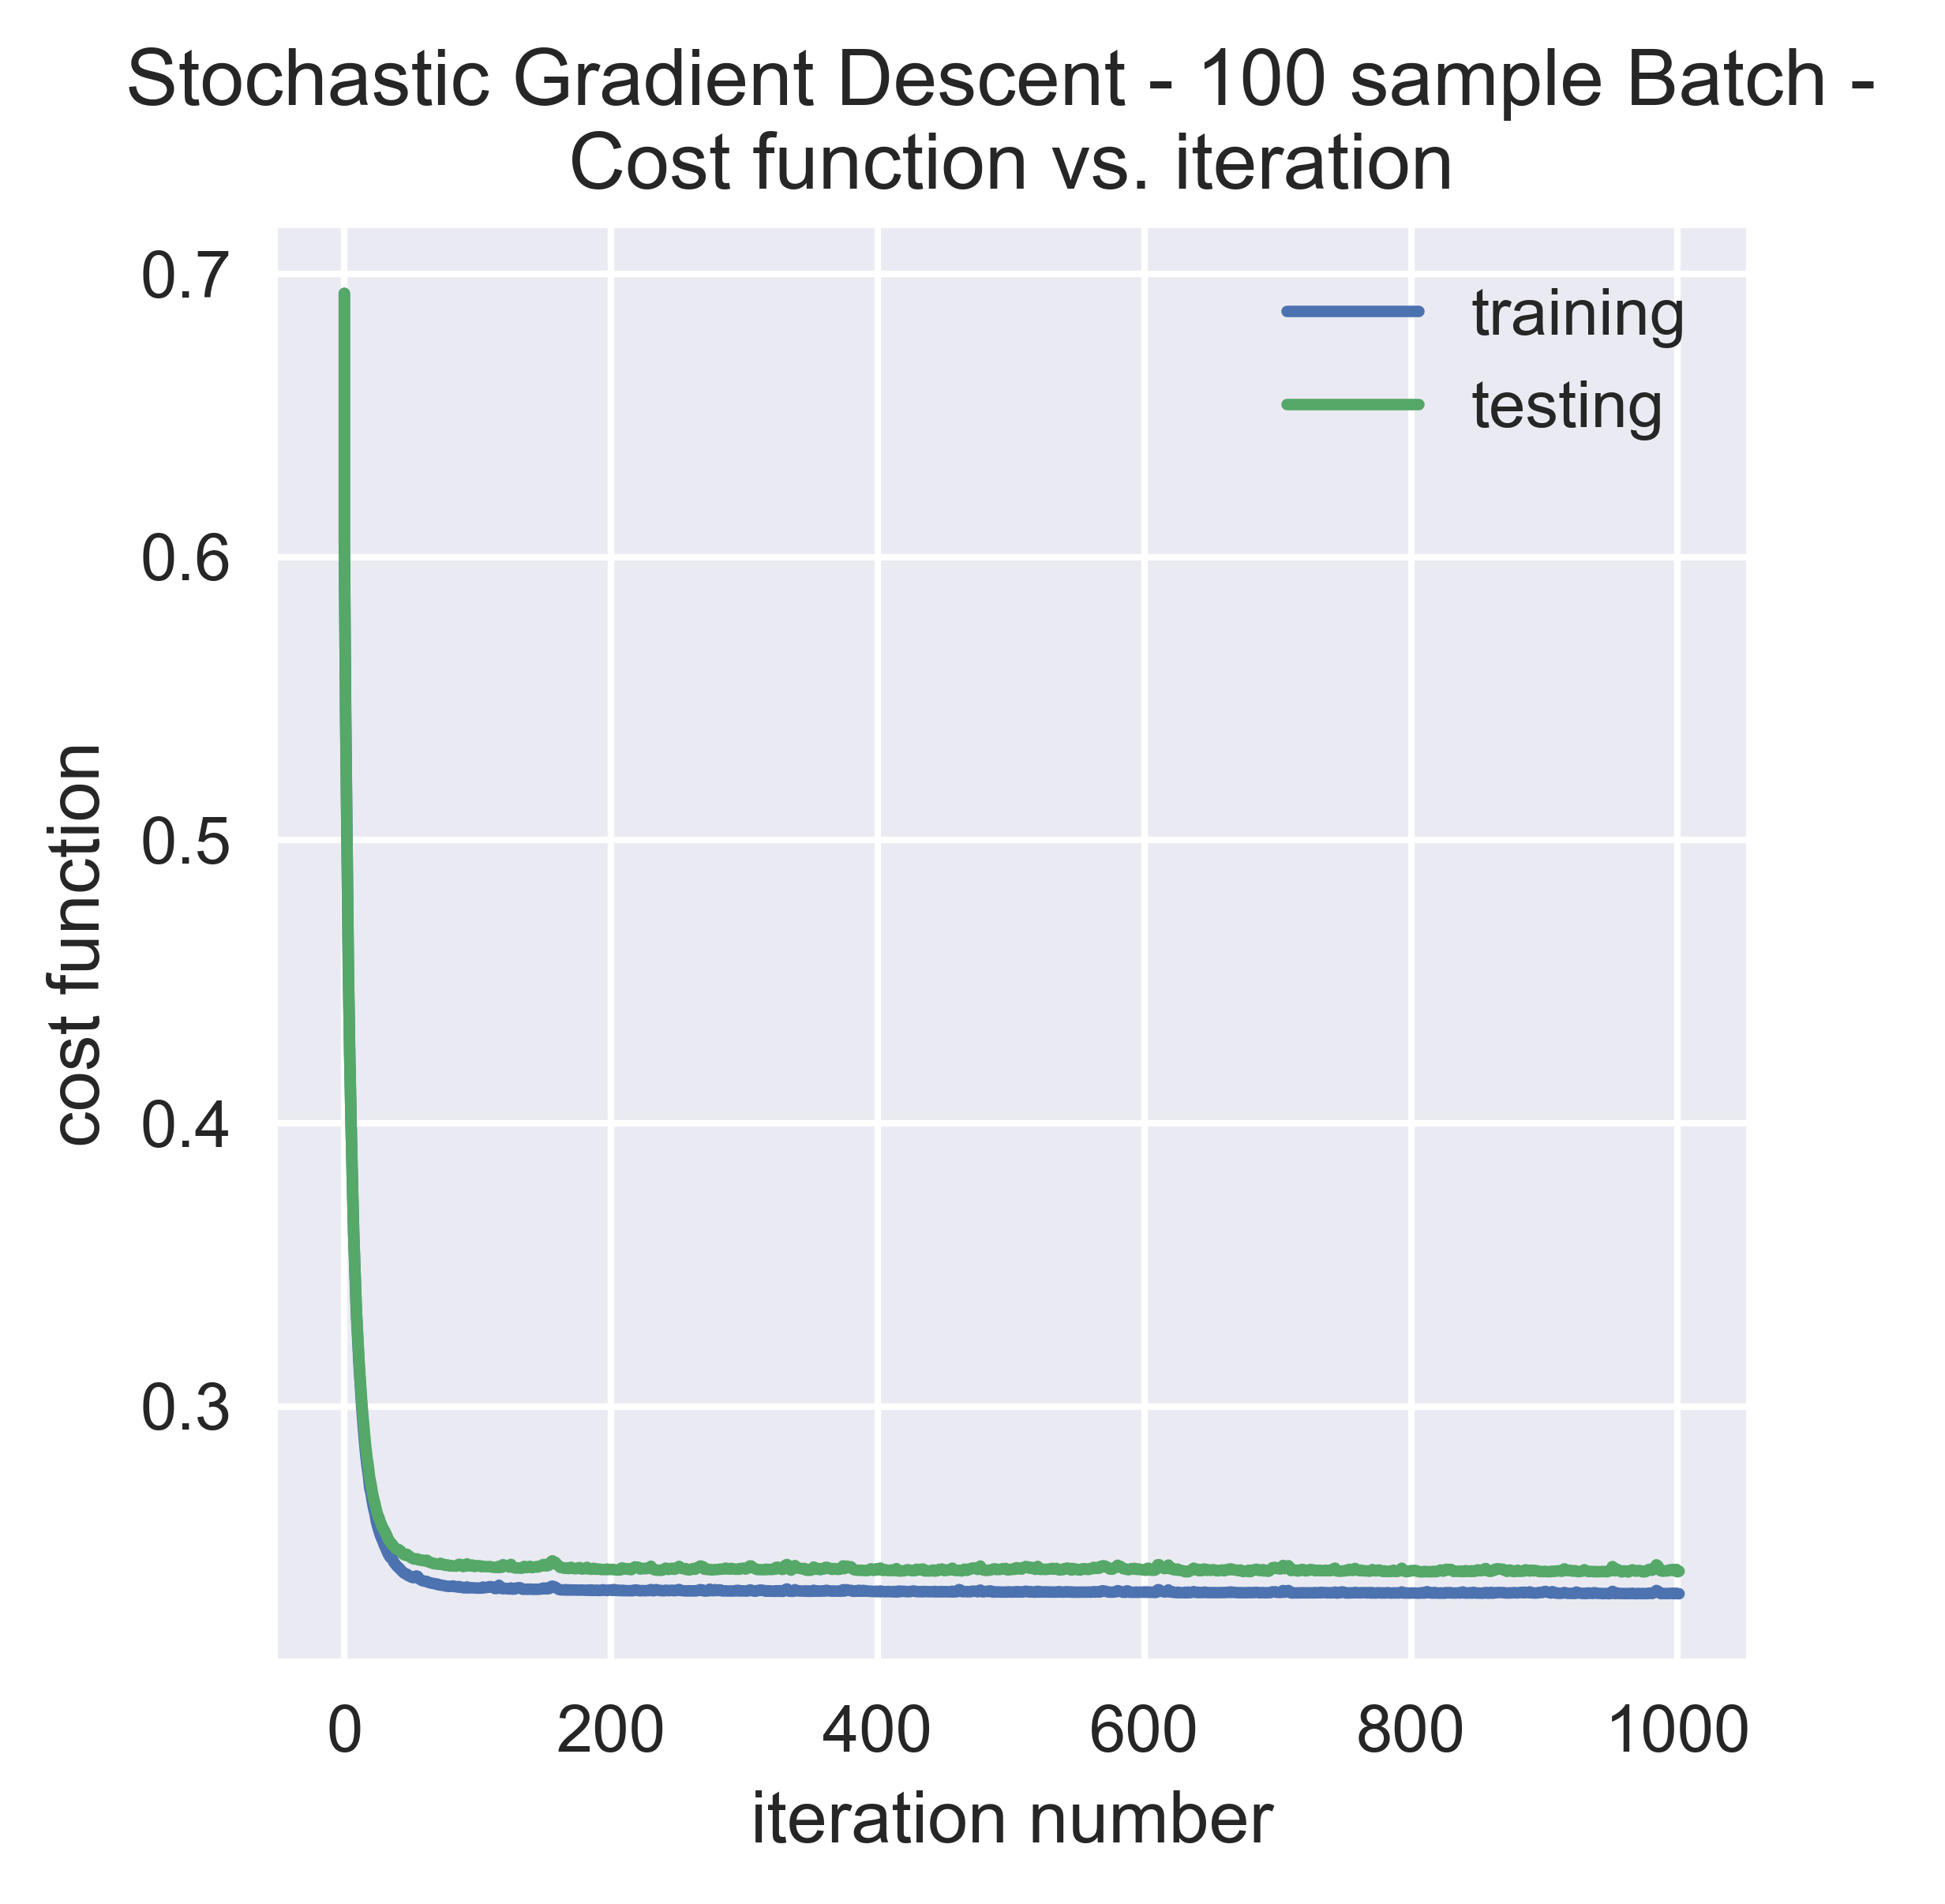

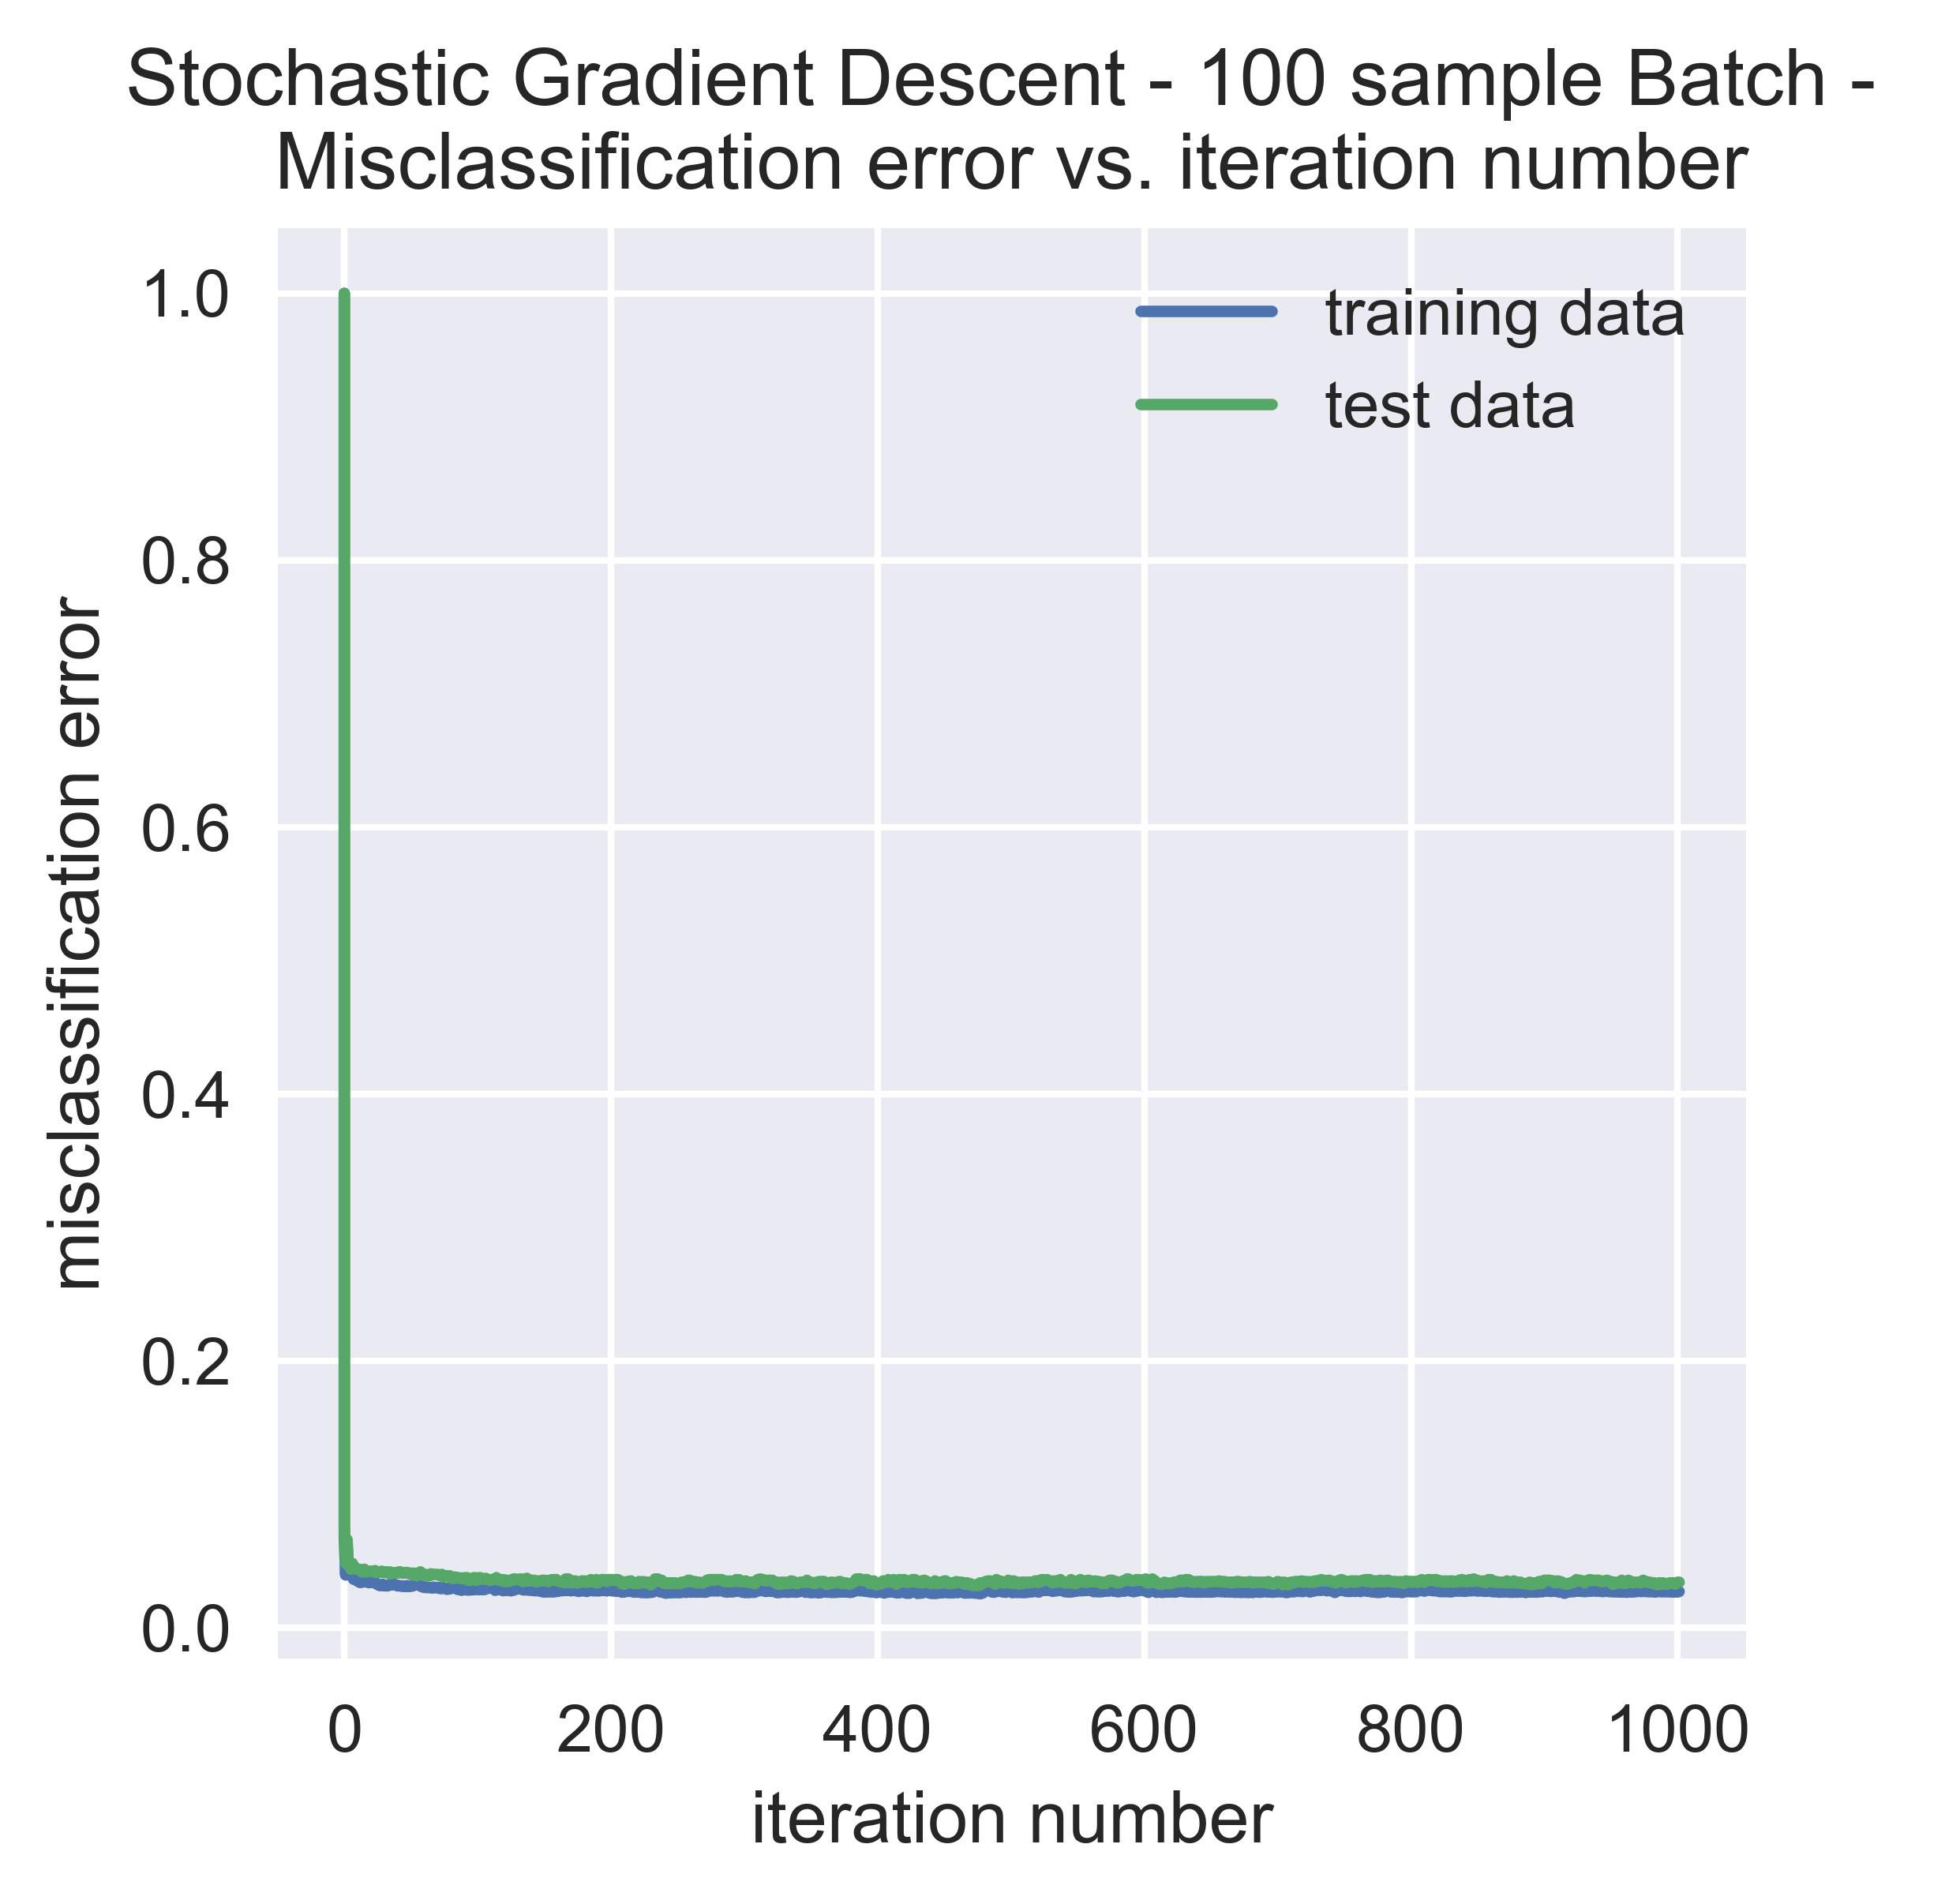

In [23]:
plot_objective_train_test(k_vec,j_train_vec,j_test_vec,train_classify_vec,test_classify_vec,'Stochastic Gradient Descent - 100 sample Batch - \n')

### newton's method 

In [24]:
j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec = newton_method(x_train_c,labels_train_c,x_test_c,labels_test_c,lambda_val)

the value of j train is 0.6931471805599452
the value of j train is 0.2735230172832013
0.0154463851117
the value of j train is 0.23791090757852226
0.00880467982396
the value of j train is 0.2360846695949867
0.00508768727408
the value of j train is 0.23559638039319708
0.00432852530296
the value of j train is 0.23521462372384072
0.00389574853352


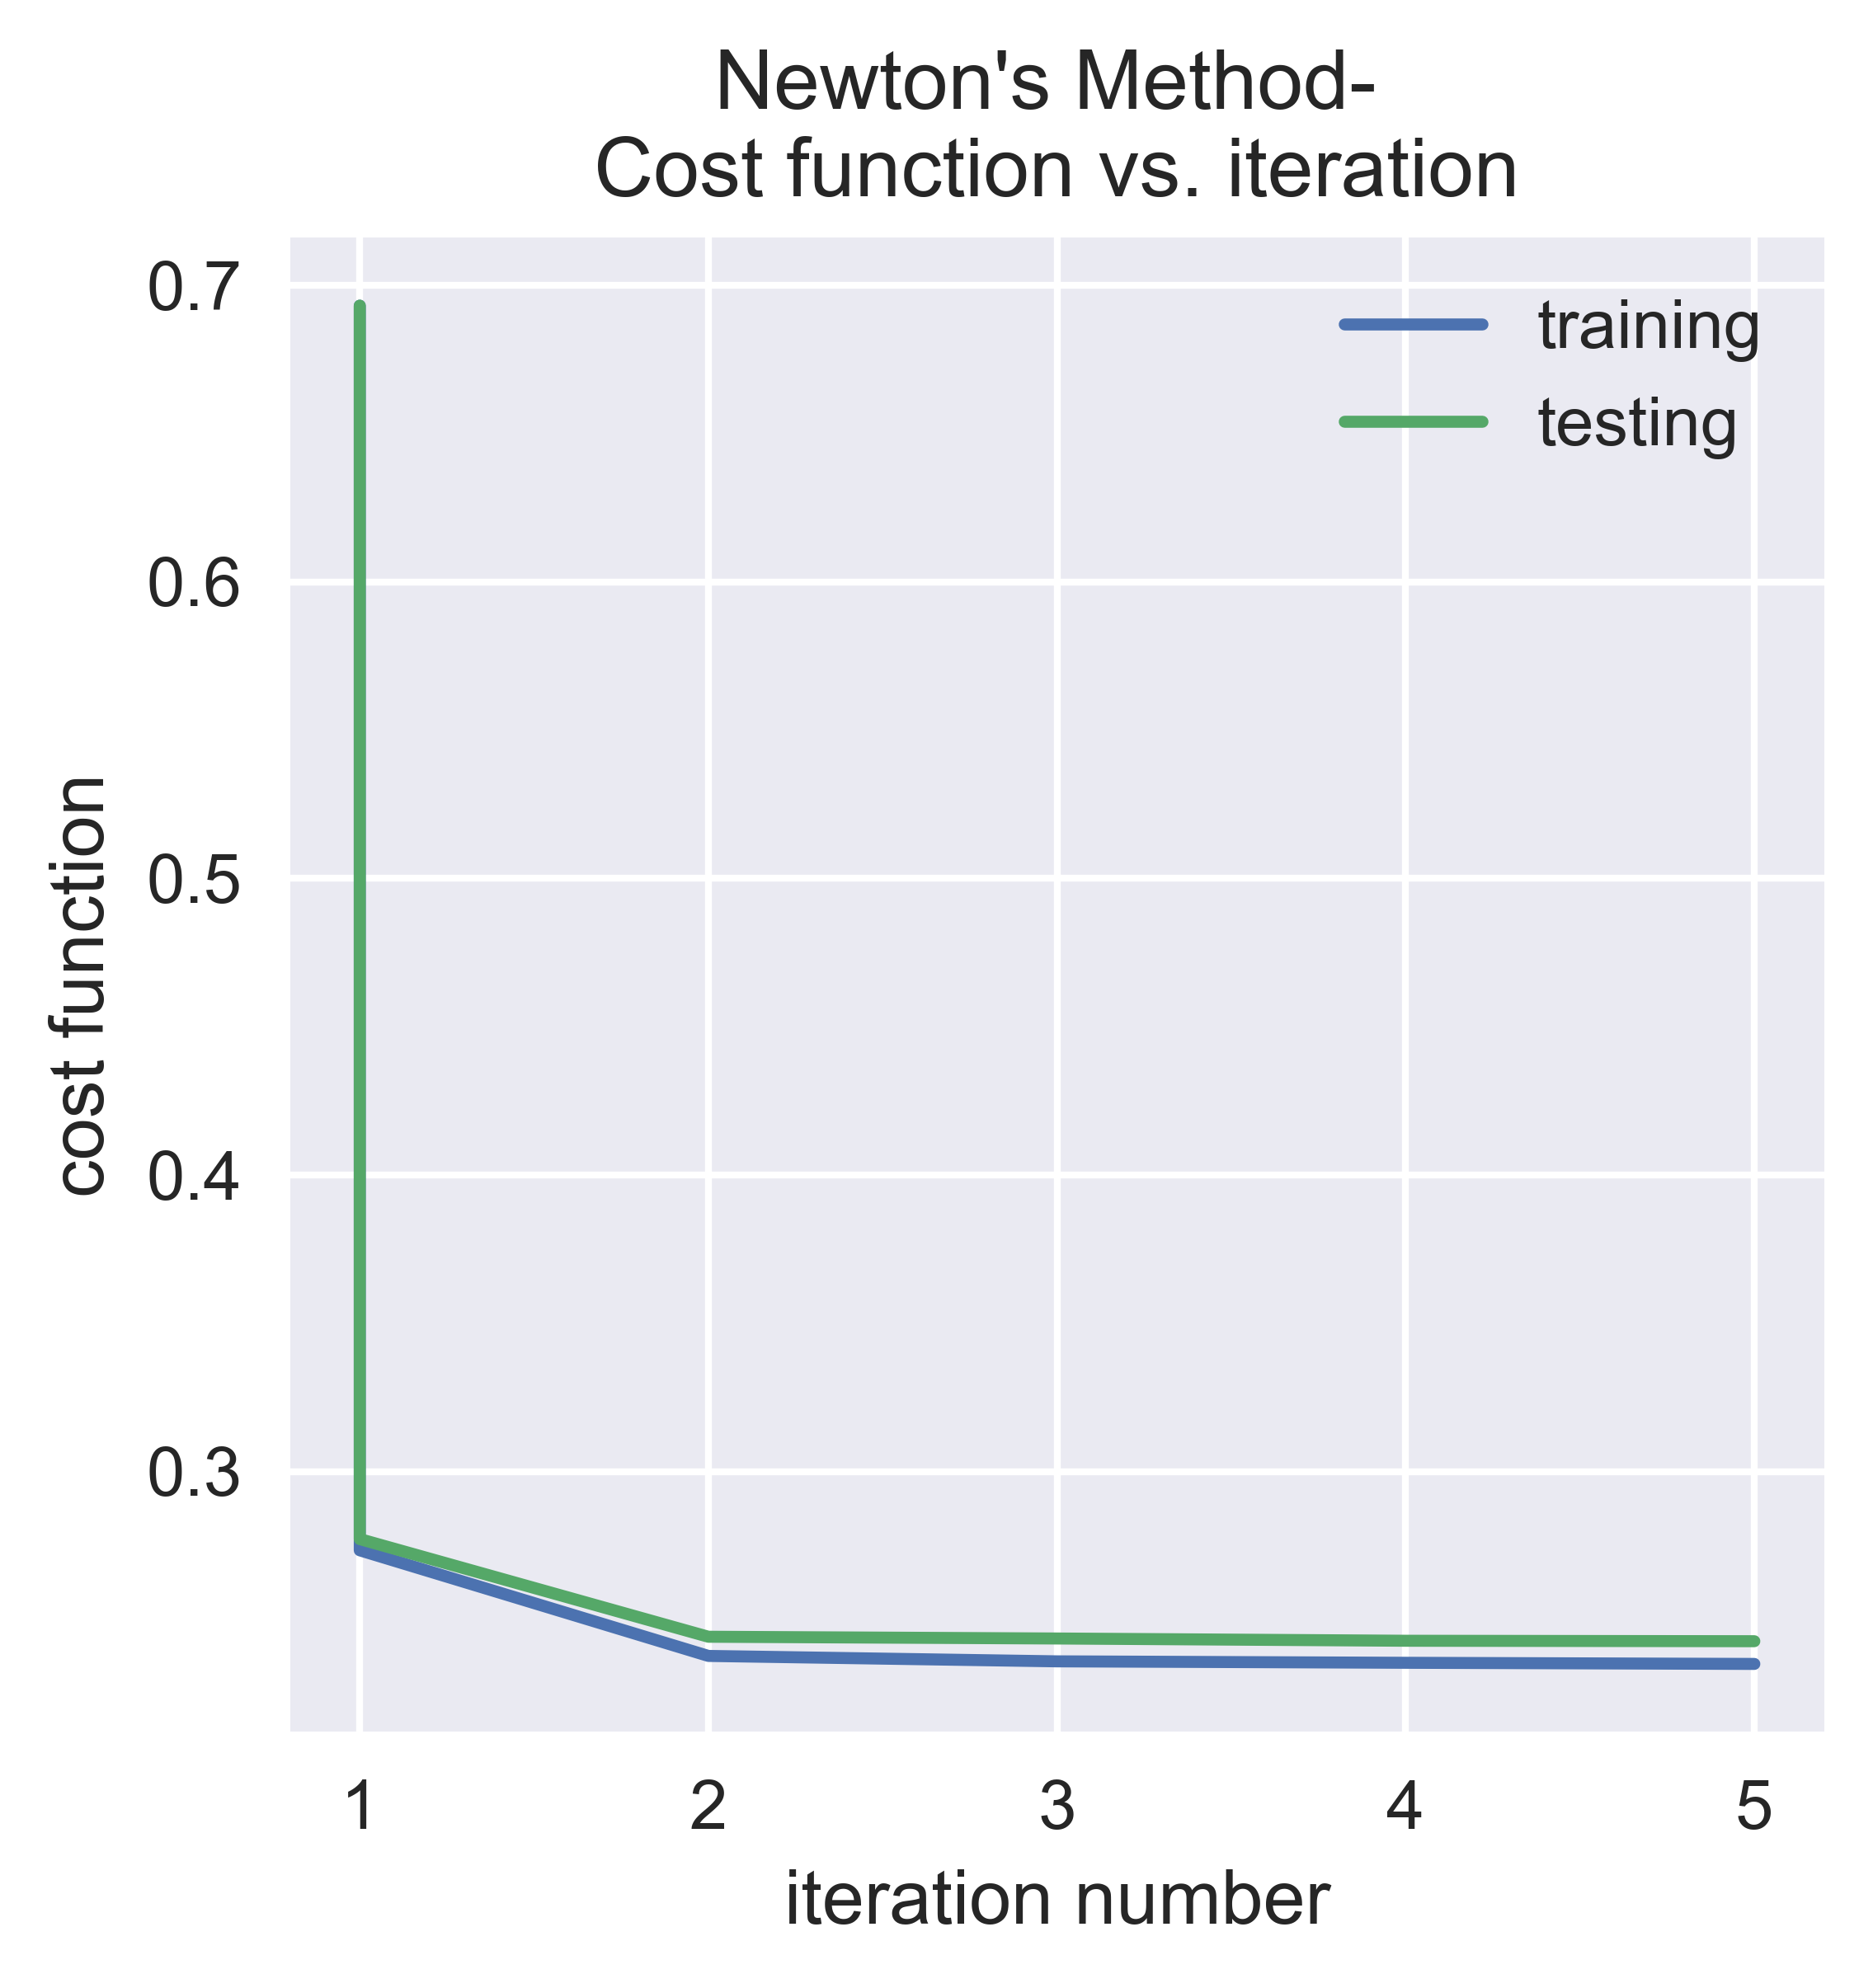

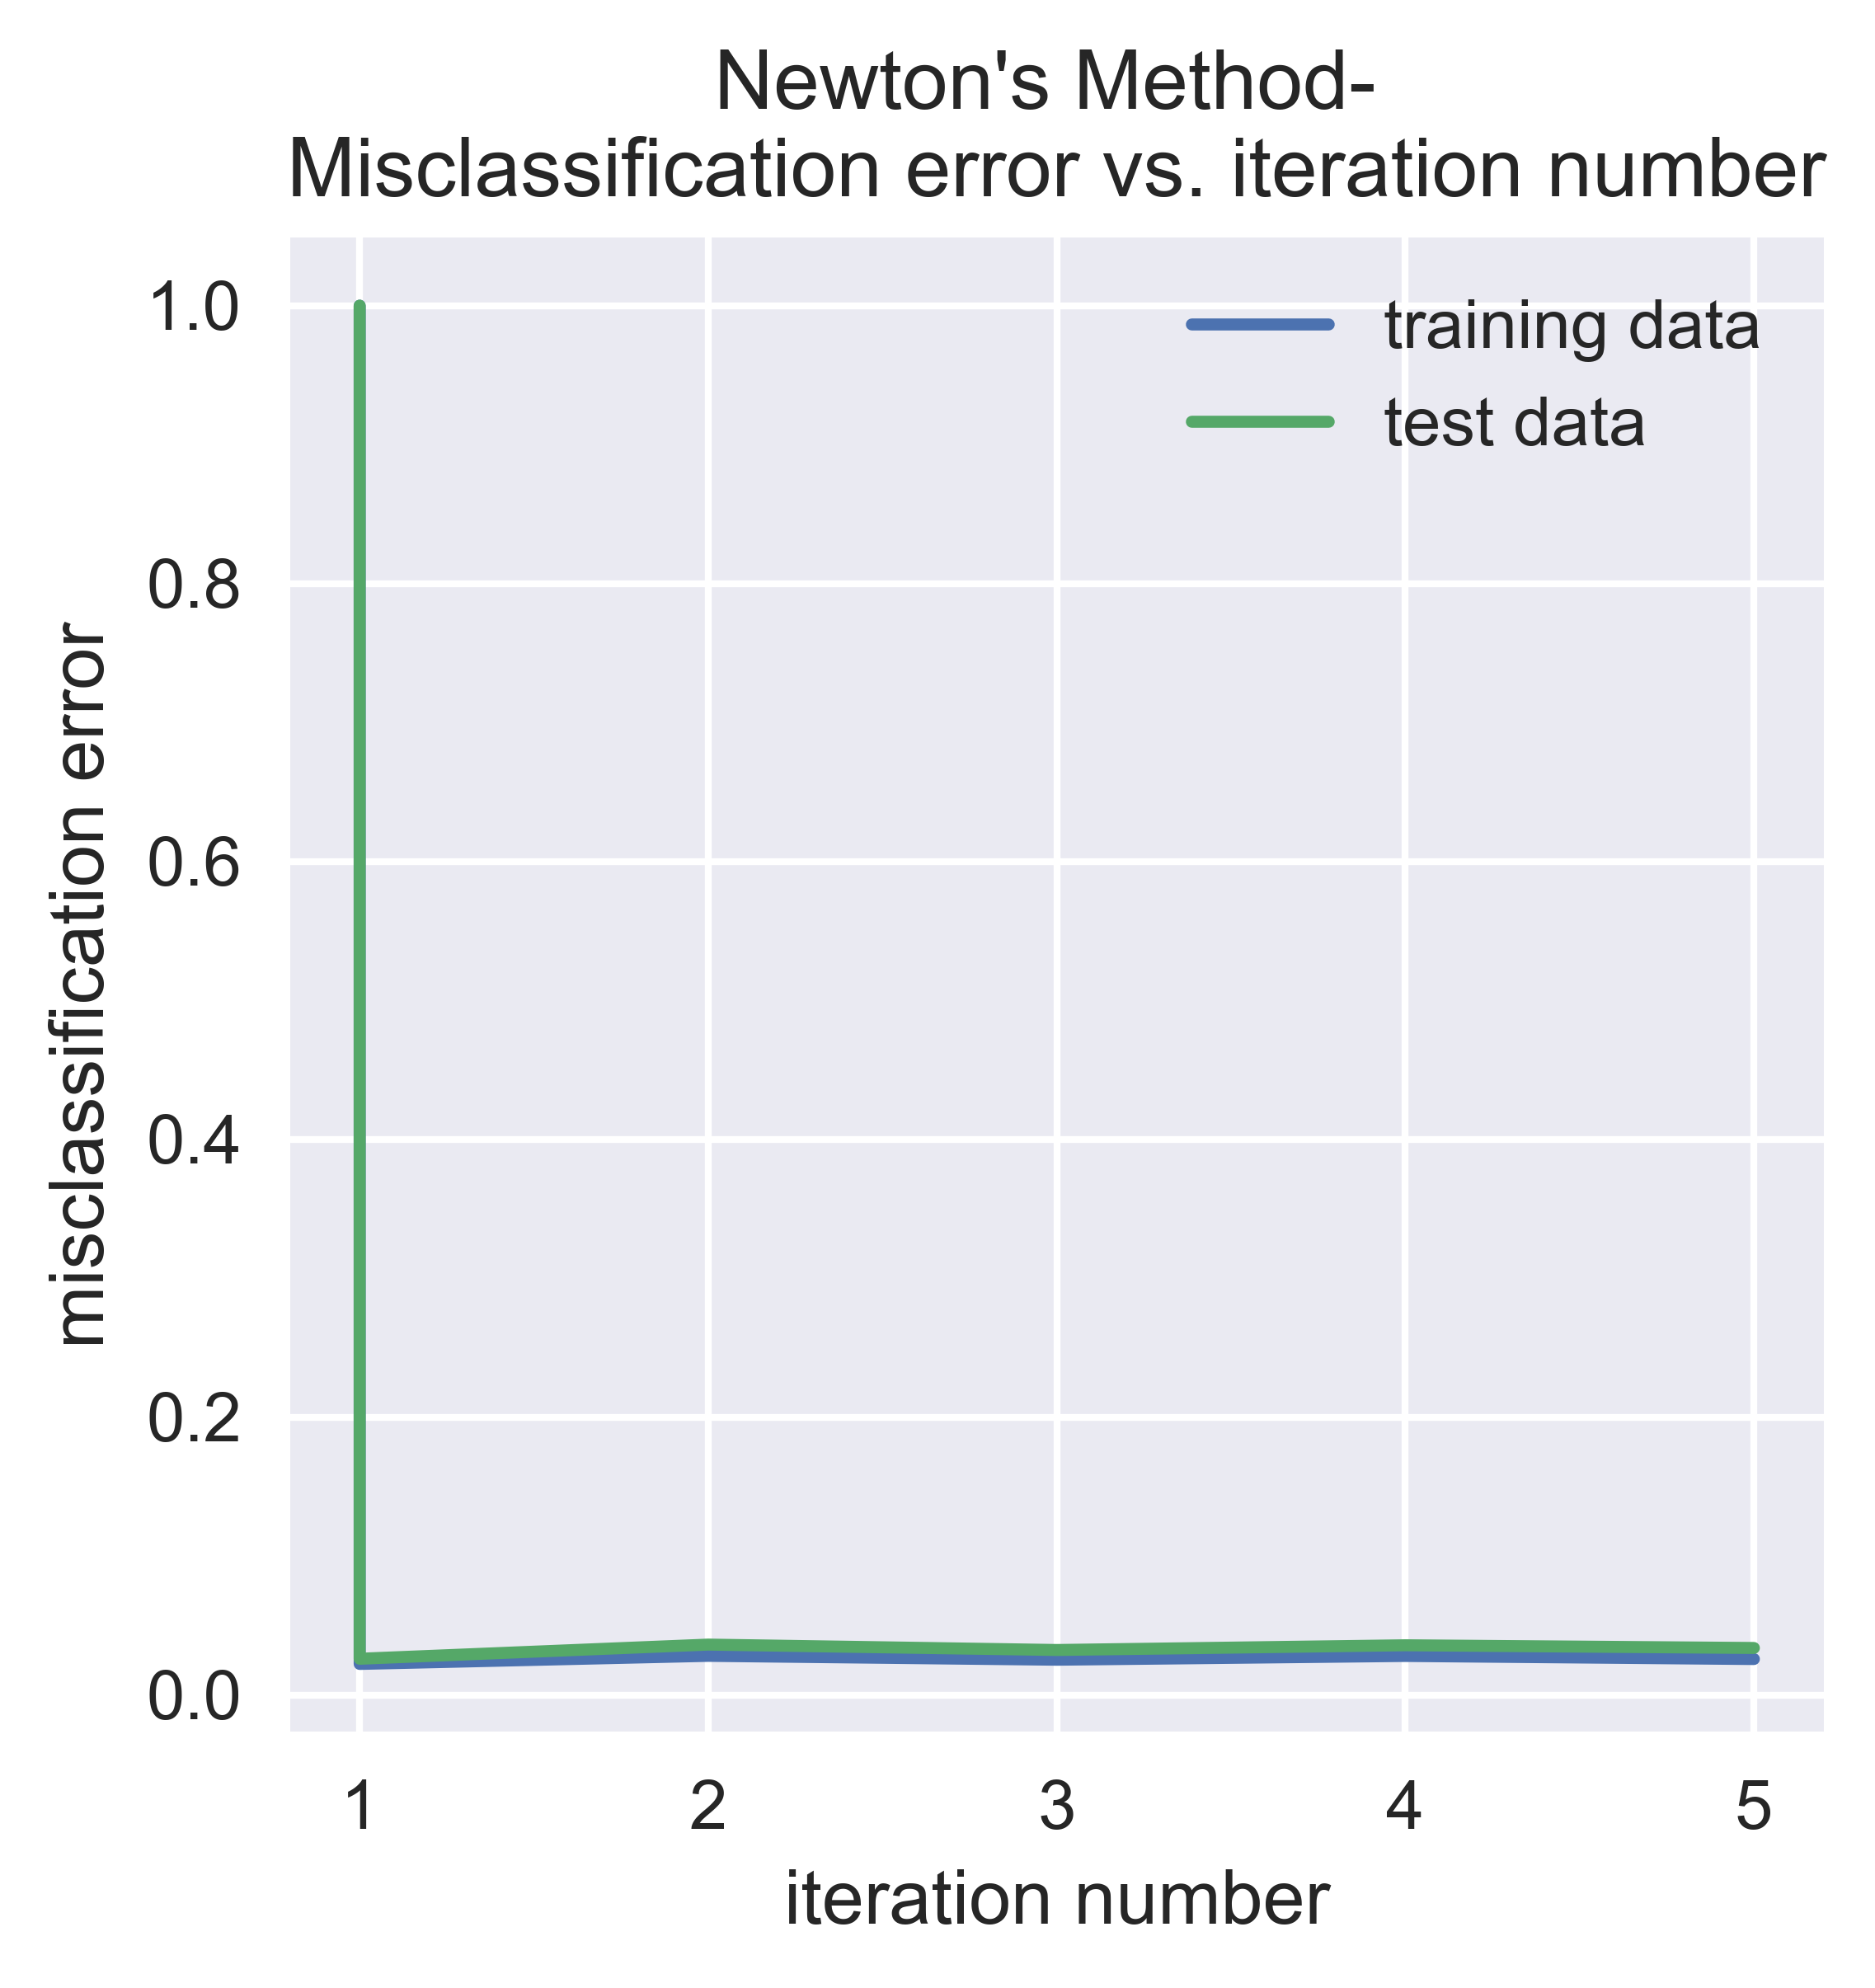

In [25]:
plot_objective_train_test(k_vec,j_train_vec,j_test_vec,train_classify_vec,test_classify_vec,'Newton\'s Method- \n')

### batch

### this is scratch below here

In [ ]:
X = x_train_c
y = labels_train_c
X_test = x_test_c
y_test = labels_test_c

not_conv = True
j_train_vec = []
j_test_vec = []
w_vec = []
b_vec = []
k_vec = []
train_classify_vec = []
test_classify_vec = []

k = 0
#step_size = 1e-3
step_size = 5e-2
criteria_conv = 2e-4

w = np.zeros((np.shape(X)[1],))
b = 0
n = np.shape(X)[0]
#mu_vec = np.zeros((np.shape(X)[0],))
#cost_mu = np.zeros((np.shape(X)[0],))
#range_vec = np.arange(len(mu_vec))
j_prev = 0

while not_conv:
    ##### training part 
    #mu_vec = [1/(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
    #cost_mu = [(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
    mu_vec = 1/(1+np.exp(-y.T*(b+np.dot(X,w)))) 
    cost_mu = 1+np.exp(-y.T*(b+np.dot(X,w)))
     
    #g_w = (1/n)*np.dot(X.T,(mu_vec - y)) + 2*lambda_val*w
    #g_b = (1/n)*np.sum(mu_vec-y)
    
    g_w = (1/n)*(np.dot(X.T,(-y*(1-mu_vec)))) + 2*lambda_val*w
    g_b = (1/n)*np.sum(-y*(1-mu_vec))
    
    j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
    ####### testing part
    
    mu_vec = 1/(1+np.exp(-y_test.T*(b+np.dot(X_test,w)))) 
    cost_mu = 1+np.exp(-y_test.T*(b+np.dot(X_test,w)))
    
    j_test = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)

    # 
    w_new = w - step_size*g_w
    b_new = b - step_size*g_b
    
    w_vec.append(w)
    b_vec.append(b)

    delta_w = np.abs(w-w_old)
    delta_b = np.abs(b-b_old)

    #w = np.array(w)
    w = copy.copy(w_new)
    b = copy.copy(b_new)

    k_vec.append(k)
    j_train_vec.append(j_train)
    j_test_vec.append(j_test)
    
    #### classificaiton
    train_signed = (b+np.dot(X,w))
    test_signed = (b+np.dot(X_test,w))

    train_data_class = np.sign(train_signed)
    test_data_class = np.sign(test_signed)

    train_classify_error_vec = [train_data_class != y]
    test_classify_error_vec = [test_data_class != y_test]
    
    train_classify_error = np.sum(train_classify_error_vec)/n
    test_classify_error = np.sum(test_classify_error_vec)/n
    
    train_classify_vec.append(train_classify_error)
    test_classify_vec.append(test_classify_error)
    
    # check convergence
    if ((1/n)*np.sum(delta_w))<criteria_conv and k>1:
        not_conv = False

    else:
        not_conv = True
        k += 1

    print('the value of j train is {}'.format(j_train))

    #print('the value of delta_w is {}'.format(delta_w))
    #print(mu_vec)
    #print(not_conv)


In [ ]:
plt.figure()
plt.plot(k_vec,j_train_vec,label='training')
plt.plot(k_vec,j_test_vec,label='testing')
plt.xlabel('iteration number')
plt.ylabel('cost function')
plt.title('Cost function vs. iteration')
plt.legend()
index = np.argmin(j_train_vec)
k_best = k_vec[index]
w_best = w_vec[index]


plt.figure()
plt.plot(k_vec,train_classify_vec,label='training data')
plt.plot(k_vec,test_classify_vec,label='test data')
plt.xlabel('iteration number')
plt.ylabel('misclassification error')
plt.title('Misclassification error vs. iteration number')
plt.legend()


In [ ]:
np.diag([1,2,3])

In [37]:
a= [1,2,3,4,5]

In [44]:
a[:-2]

[1, 2, 3]